# Question/Objective

- This dataset contains information on the levels of nitrogen, phosphorus, and potassium in soil, as well as temperature, humidity, pH, and rainfall, and their impact on the growth of crops. 
- The data can be used to make data-driven recommendations for achieving optimal nutrient and environmental conditions to improve crop yield.

# Importing the libraries required

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Database and Analyzing the data.

In [134]:
data = pd.read_csv('crop_recommendation.csv') # Store the data as data.

- Gather some insights and take a brief look at the data.

In [135]:
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [136]:
data.shape

(2200, 10)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


- Based on data.info(), we understand that:
    - There are 2 extra columns which have no values.
    - There are no Null or Missing Values in Columns 1 to 7.
- We will drop the last 2 empty columns.

In [138]:
data.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Unnamed: 8,Unnamed: 9
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,0.0,0.0
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN,NaN
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,NaN,NaN


- It has been noted that there are 2 extra columns which have no values.
- Rename first column to fit the naming conventions / general heading convention for this dataset.
- We will drop the last two.

In [139]:
data_1 = data.drop(data.columns[[-2,-1]], axis=1)
data_1 = data_1.rename(columns={"Nitrogen": "nitrogen"})
data_1.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


- Check the types of plants present in this dataset.

In [140]:
cropTypes = data_1["label"].unique()

In [141]:
len(cropTypes)

22

<Axes: title={'center': 'Types of Plants in dataset'}>

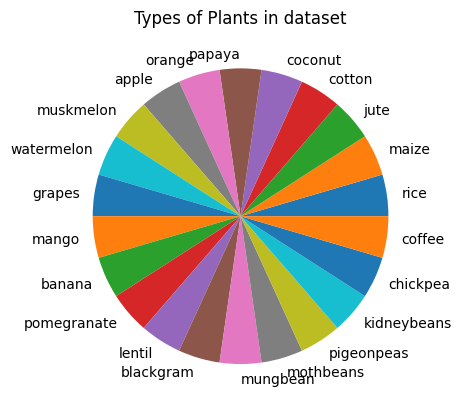

In [142]:
data["label"].value_counts().plot(kind="pie", title="Types of Plants in dataset", ylabel="")

- Based on the piechart, it appears that the number of data for each type of plant is rather equal. 

nitrogen          Axes(0.125,0.53;0.168478x0.35)
phosphorus     Axes(0.327174,0.53;0.168478x0.35)
potassium      Axes(0.529348,0.53;0.168478x0.35)
temperature    Axes(0.731522,0.53;0.168478x0.35)
humidity          Axes(0.125,0.11;0.168478x0.35)
ph             Axes(0.327174,0.11;0.168478x0.35)
rainfall       Axes(0.529348,0.11;0.168478x0.35)
dtype: object

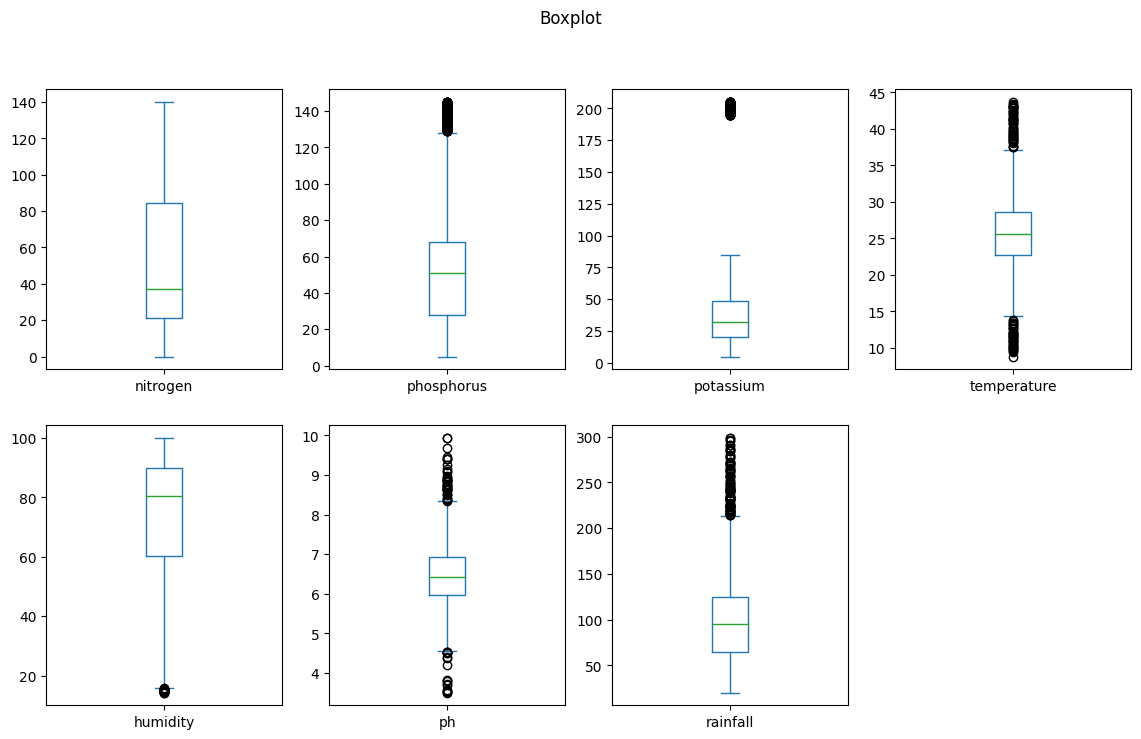

In [159]:
colType = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']

data_1[colType].plot(kind='box', subplots=True, layout=(2,4), figsize=(14,8), title="Boxplot")

- From the plots, it can be observed that there are many data points that seem like "outliers" for all factors except nitrogen. This may be due to the different optimal soil conditions for the different plants.
- We shall do a box plot for the same variables, but with grouping by the types of crop.

/Users/javianng/opt/anaconda3/envs/DataScience_Python/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


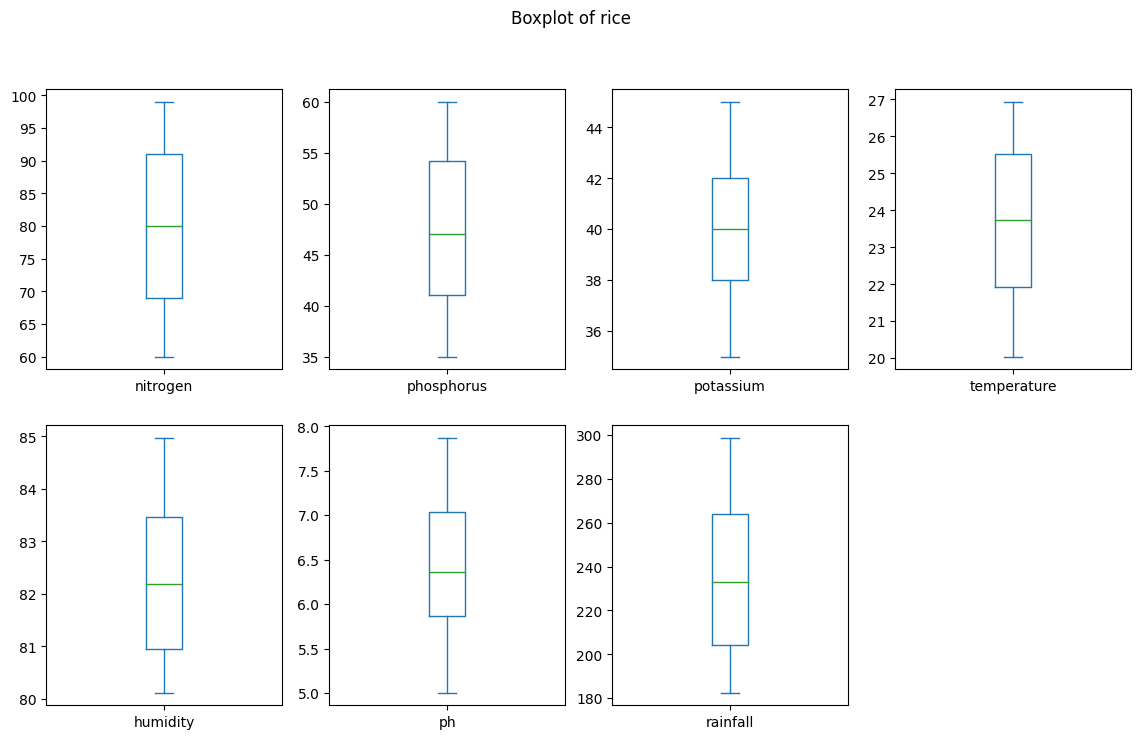

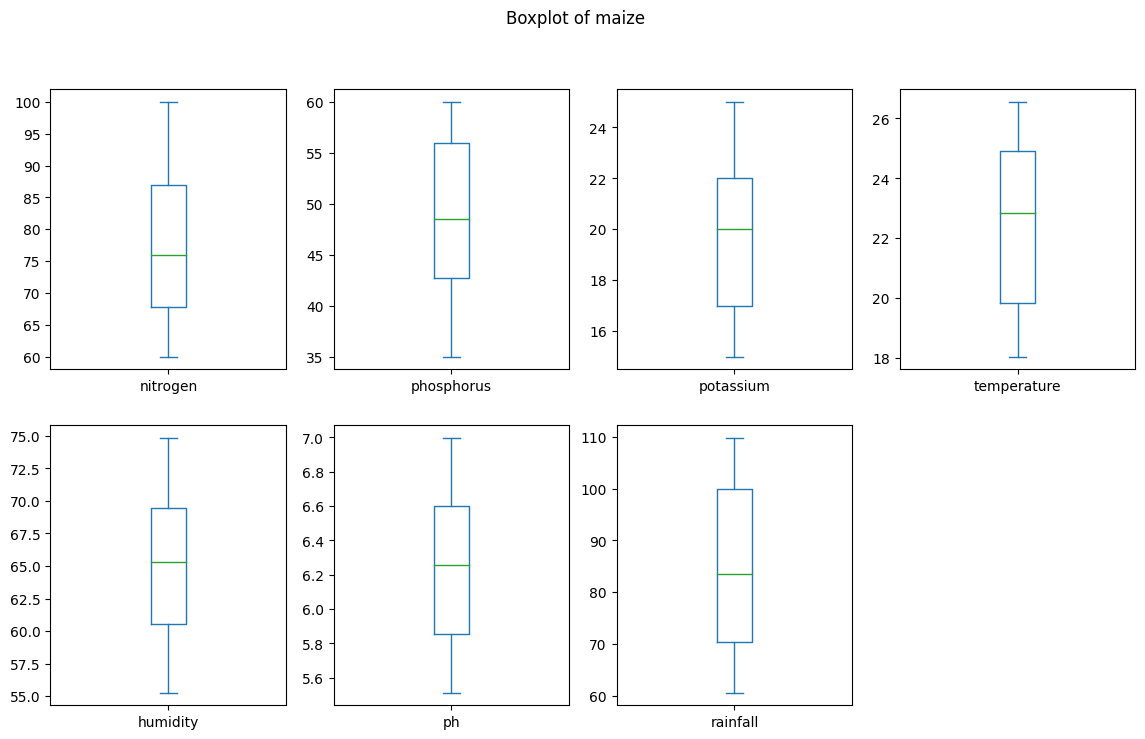

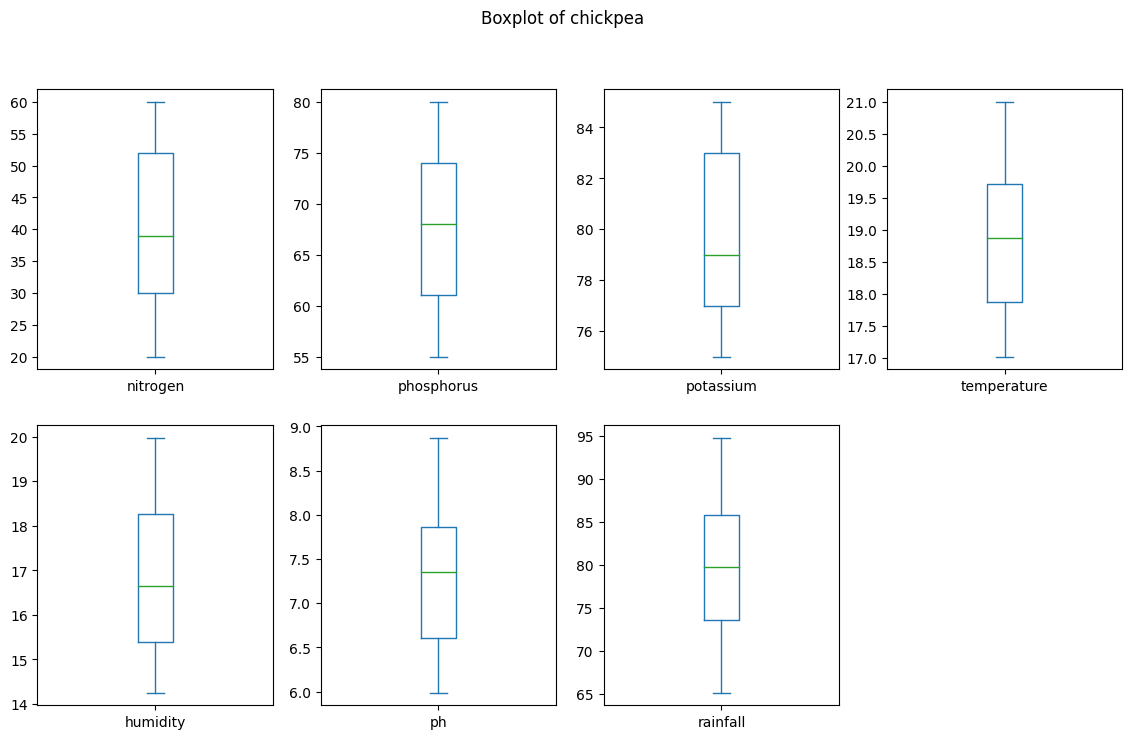

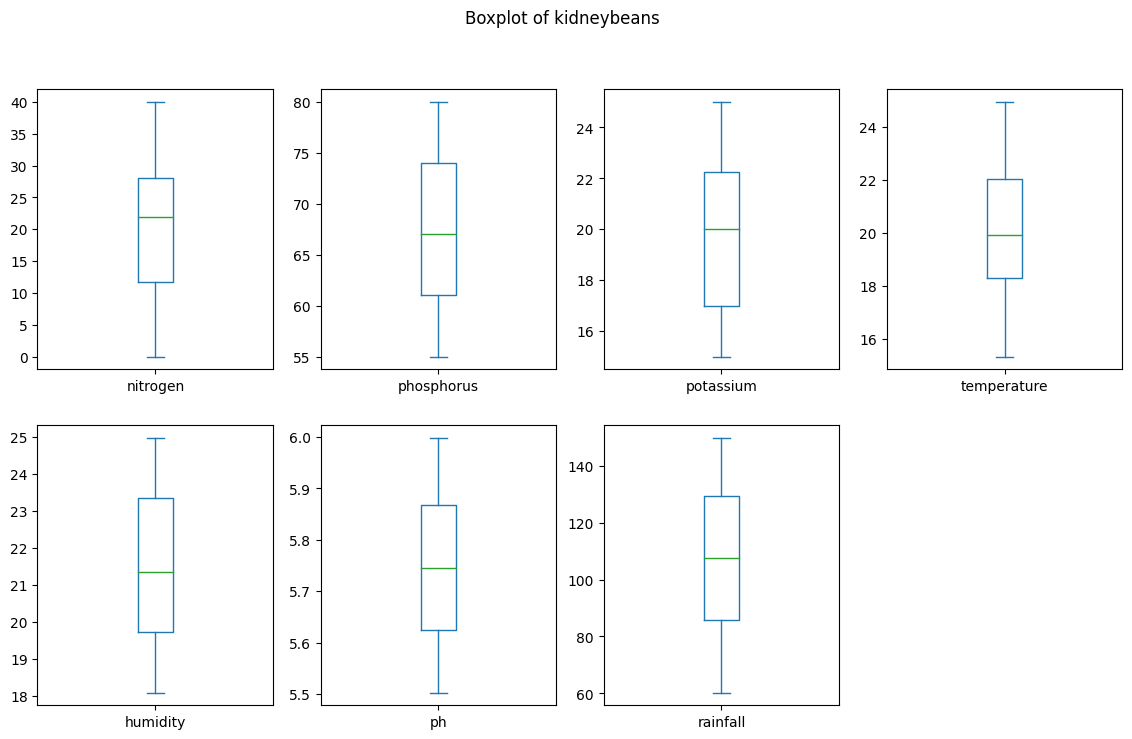

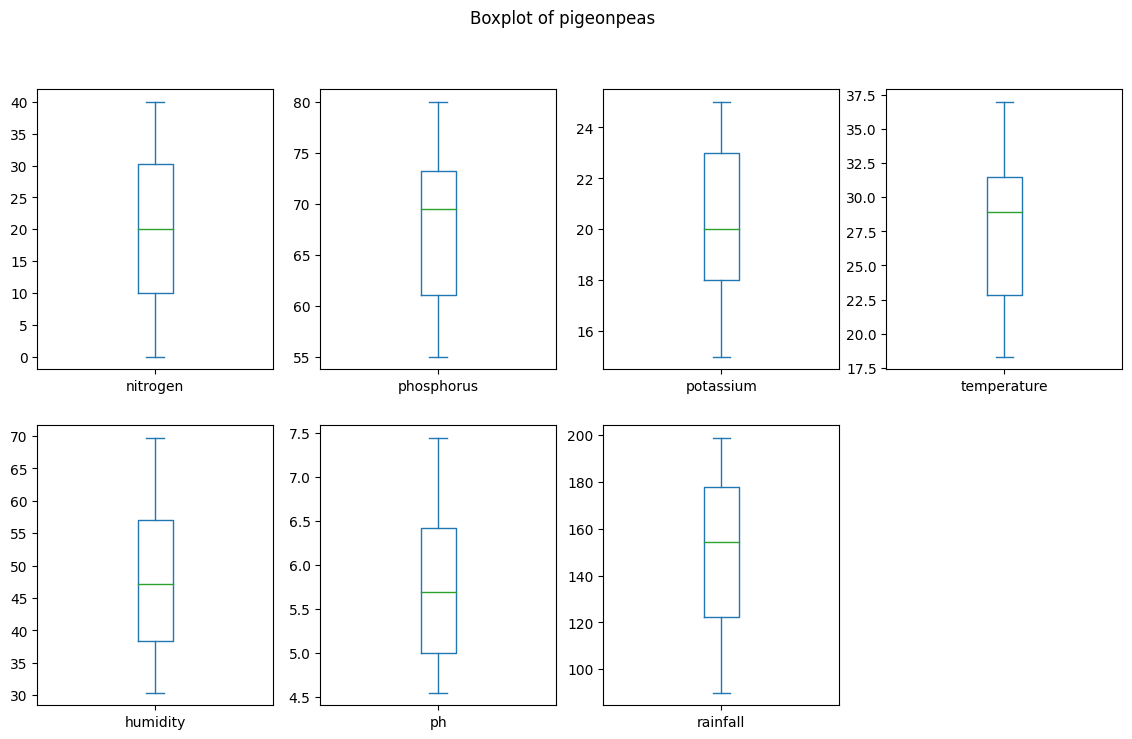

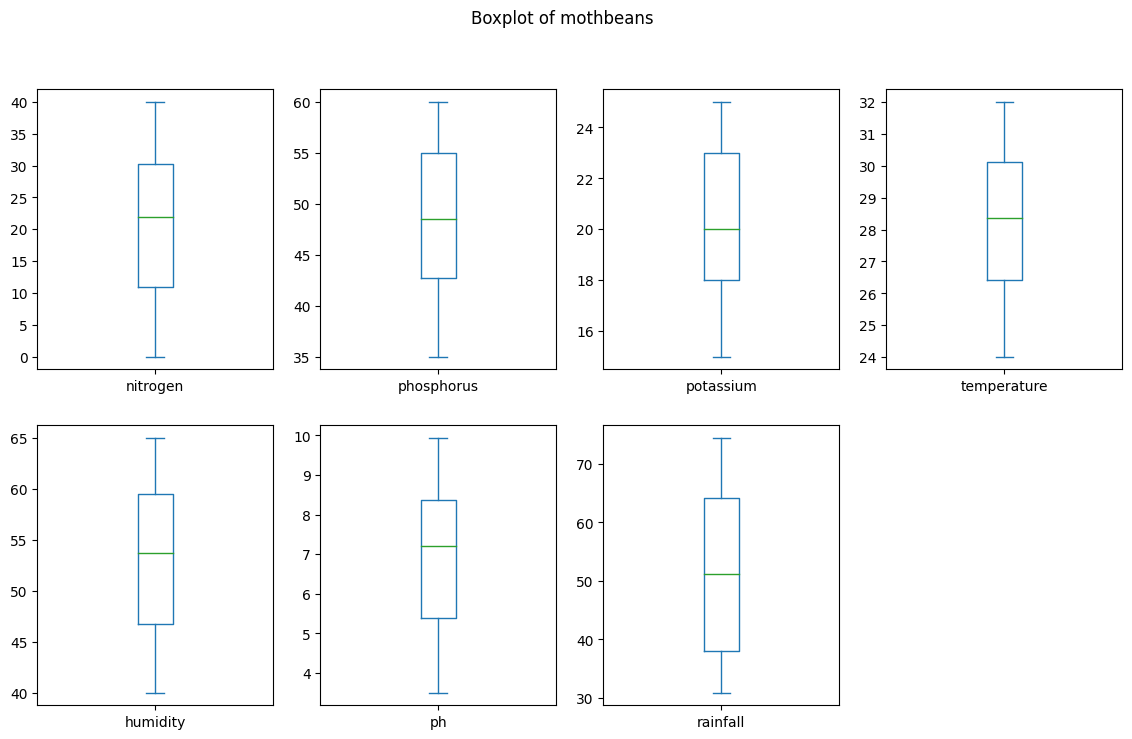

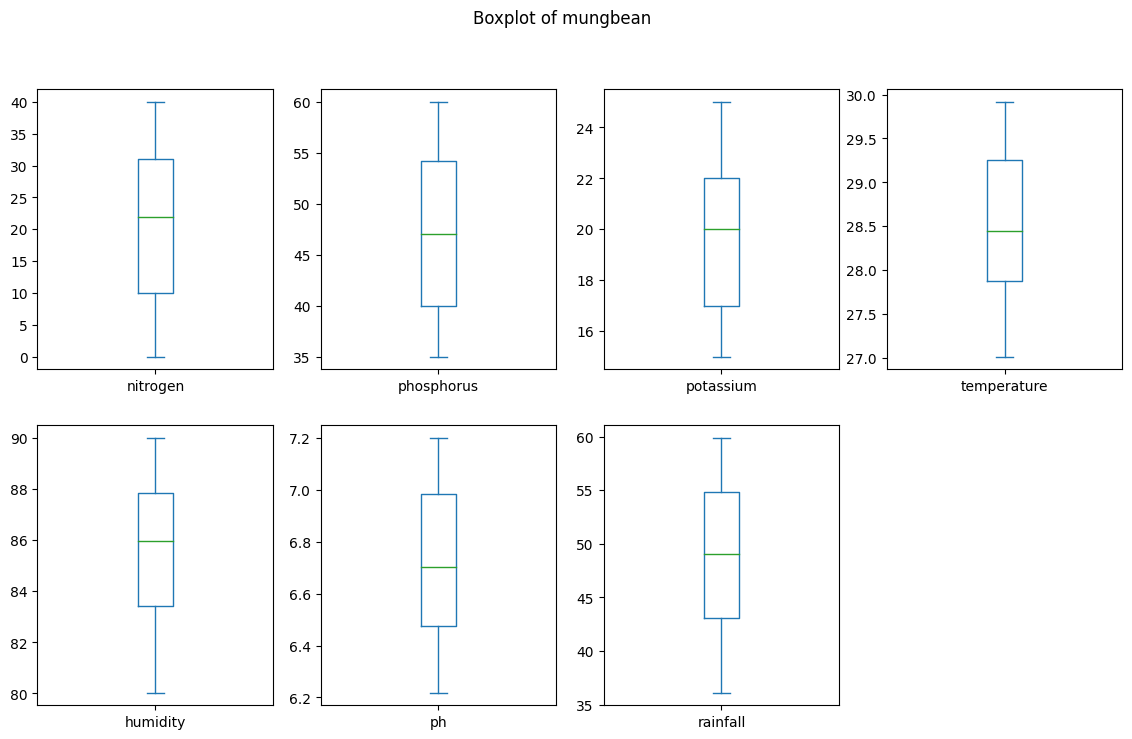

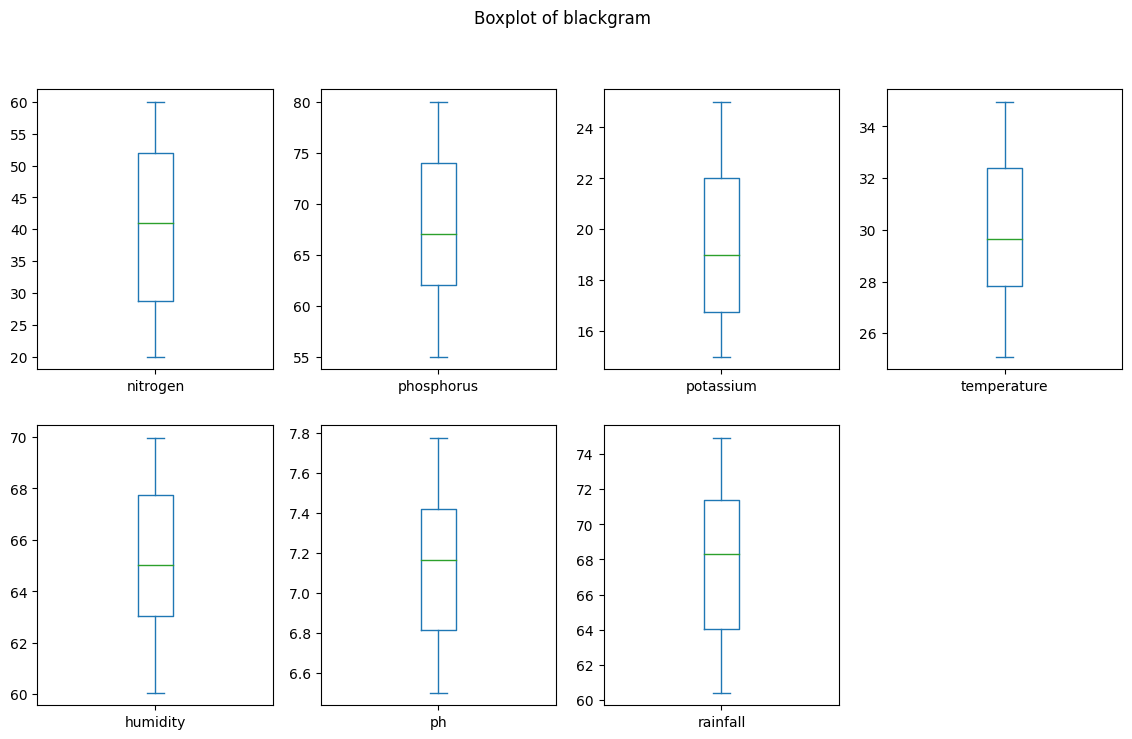

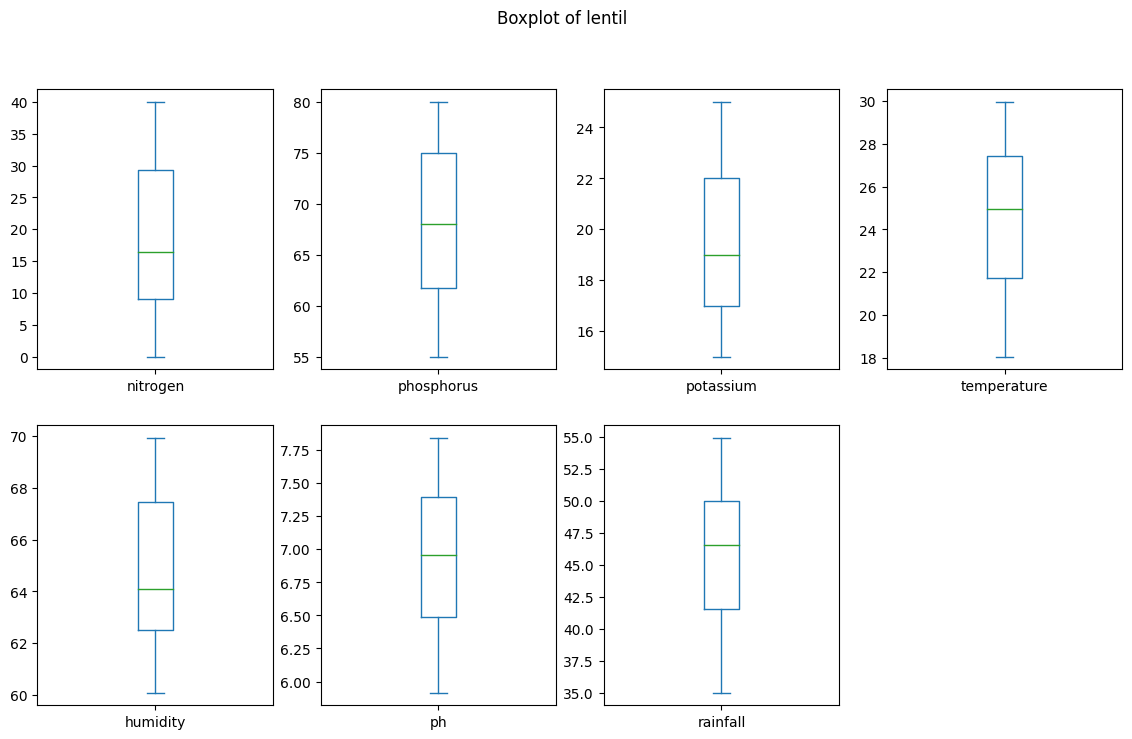

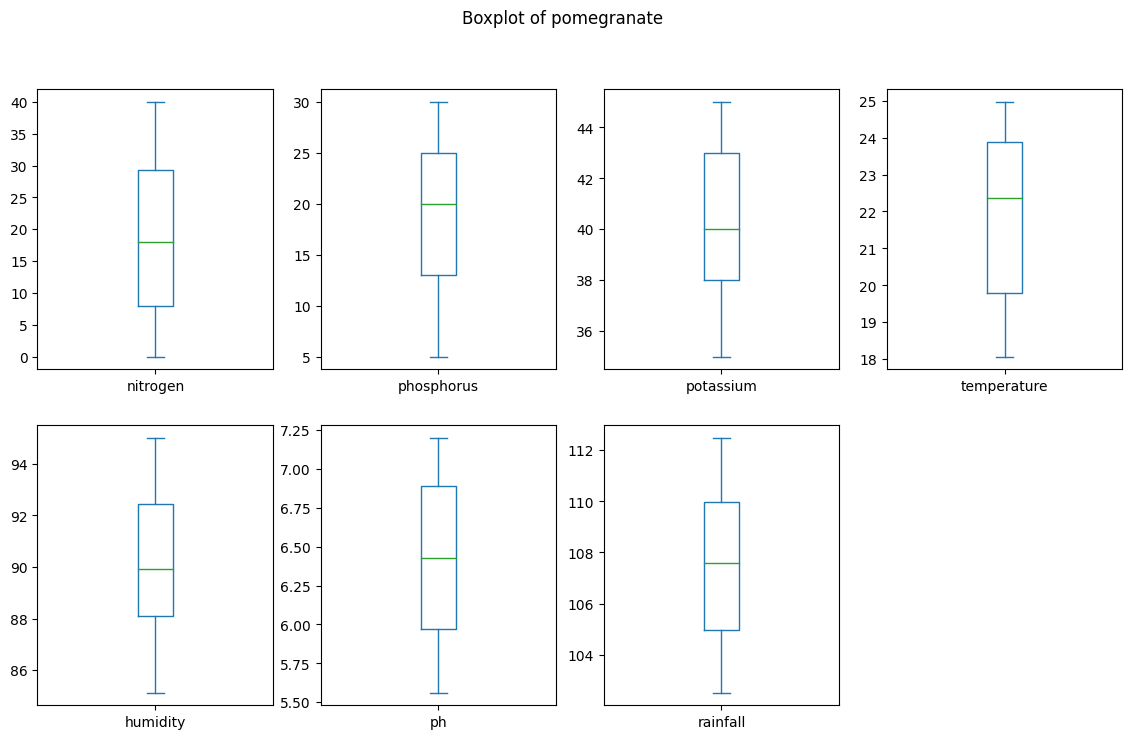

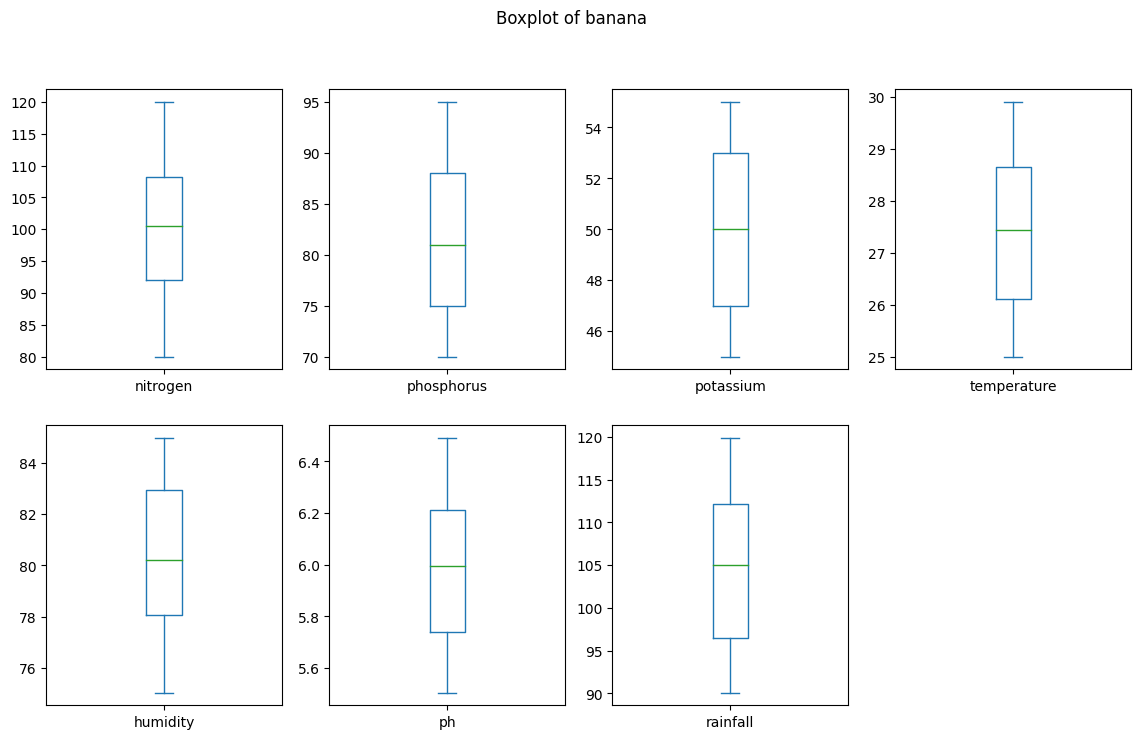

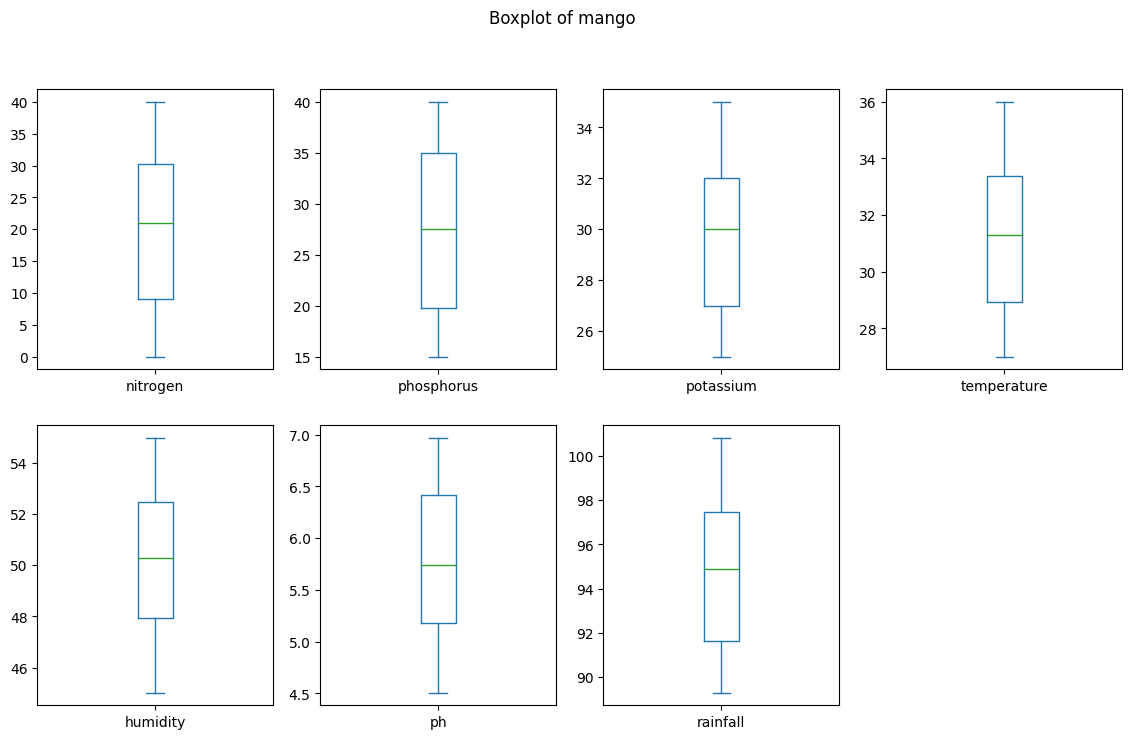

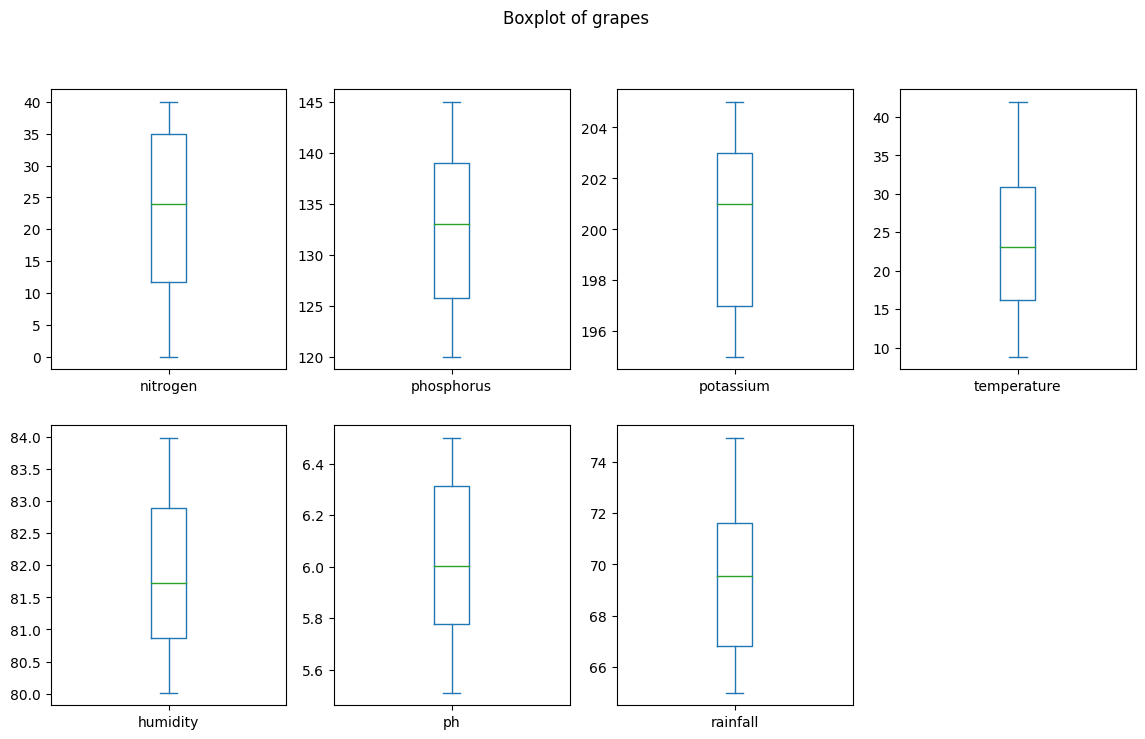

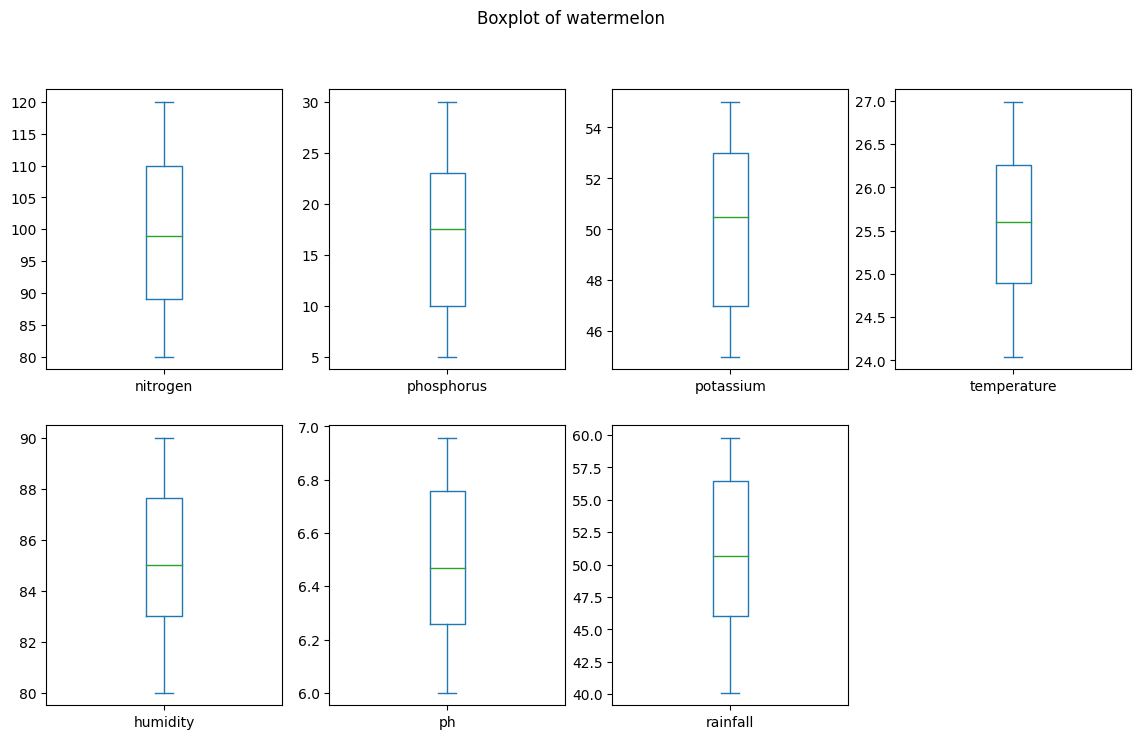

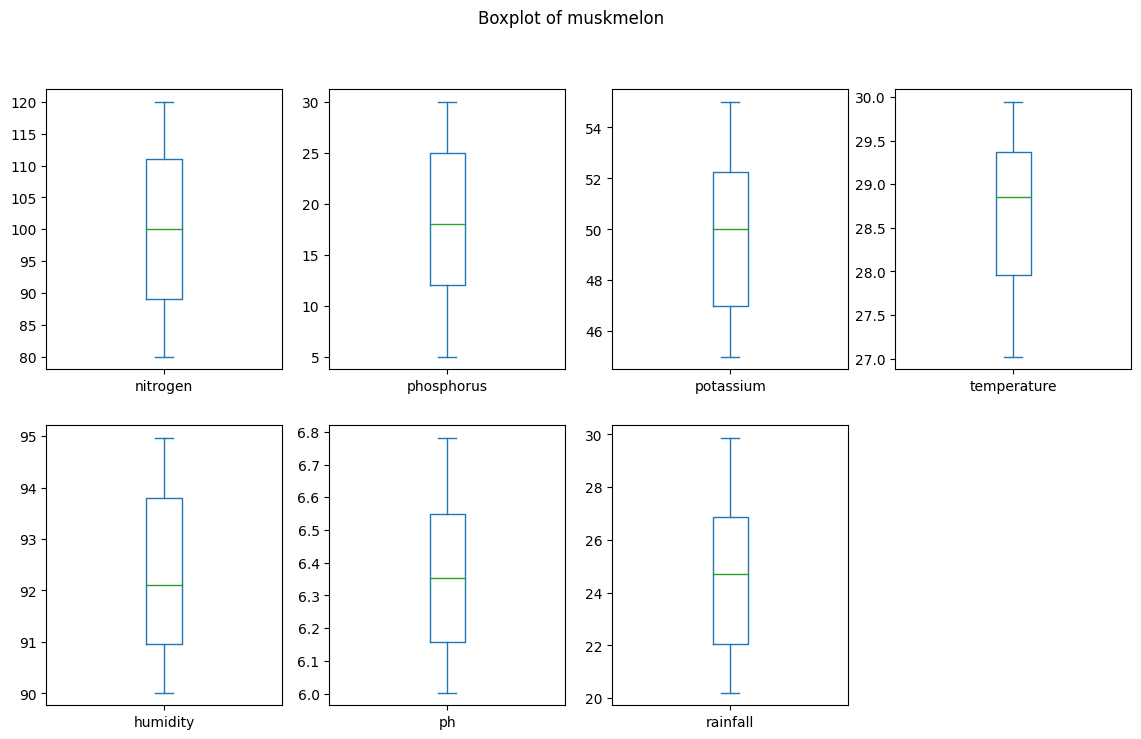

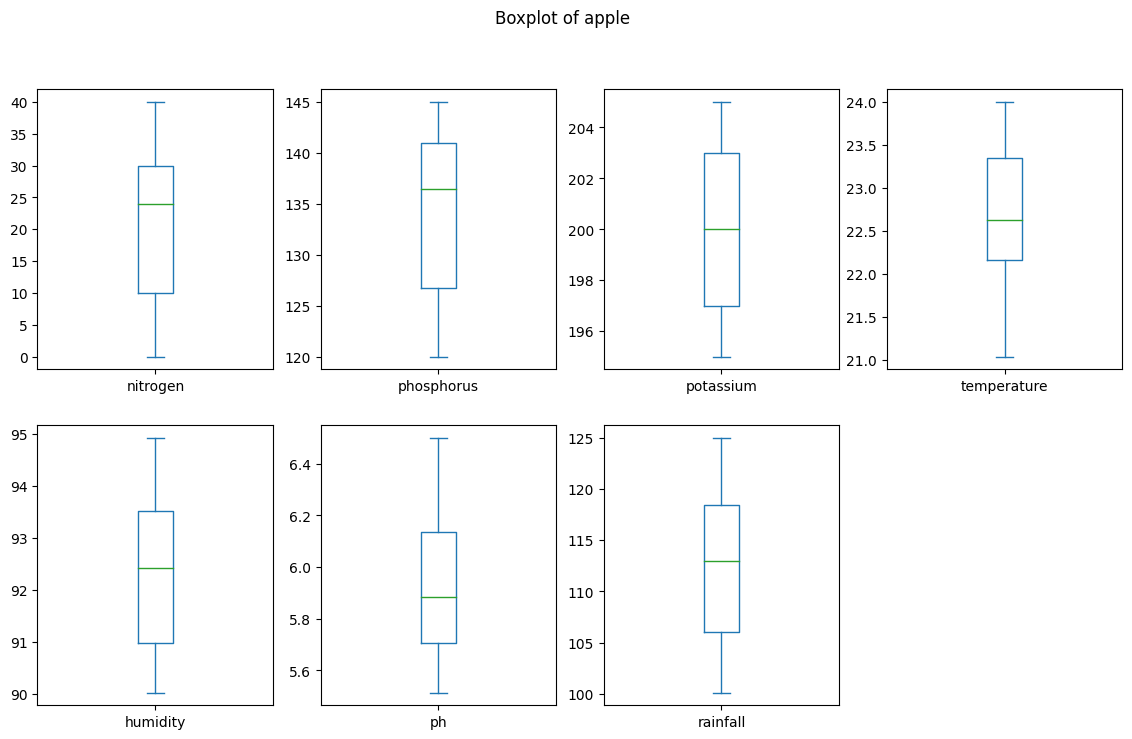

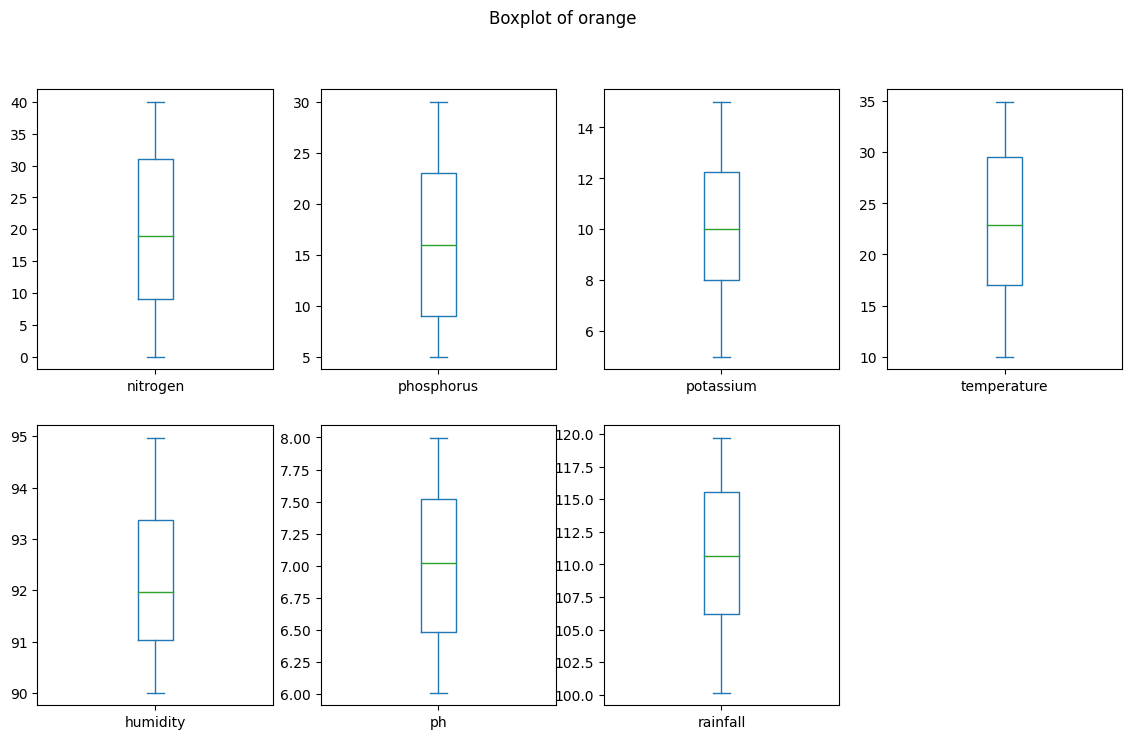

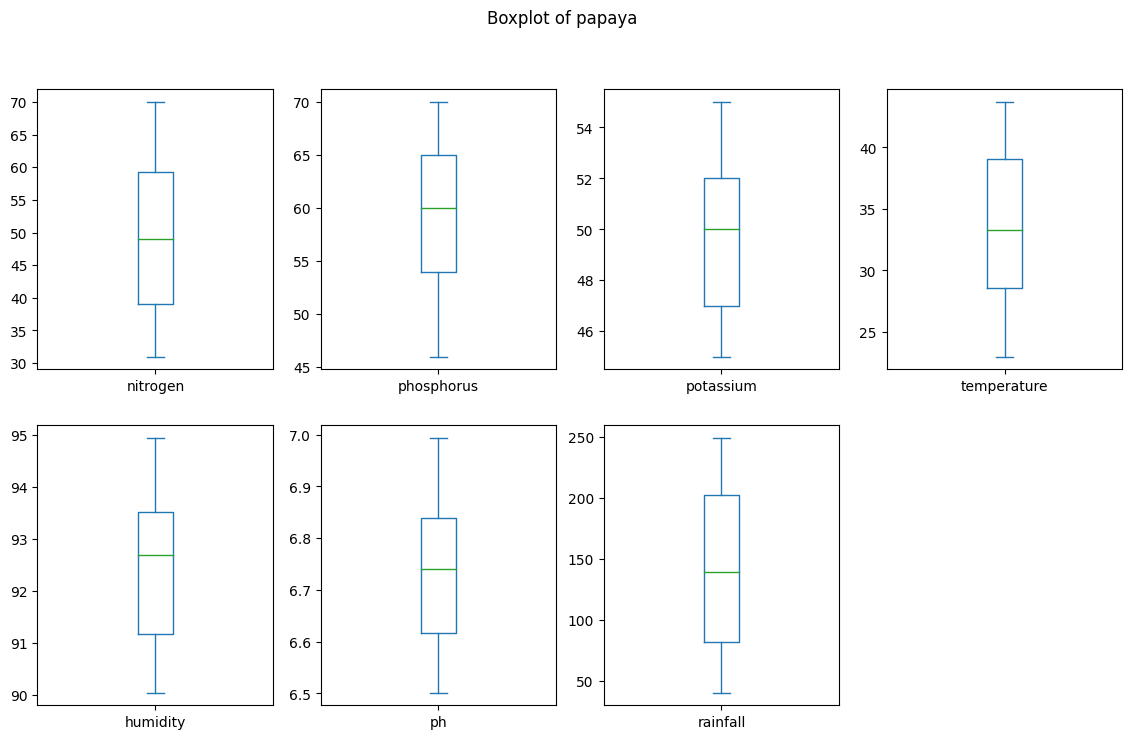

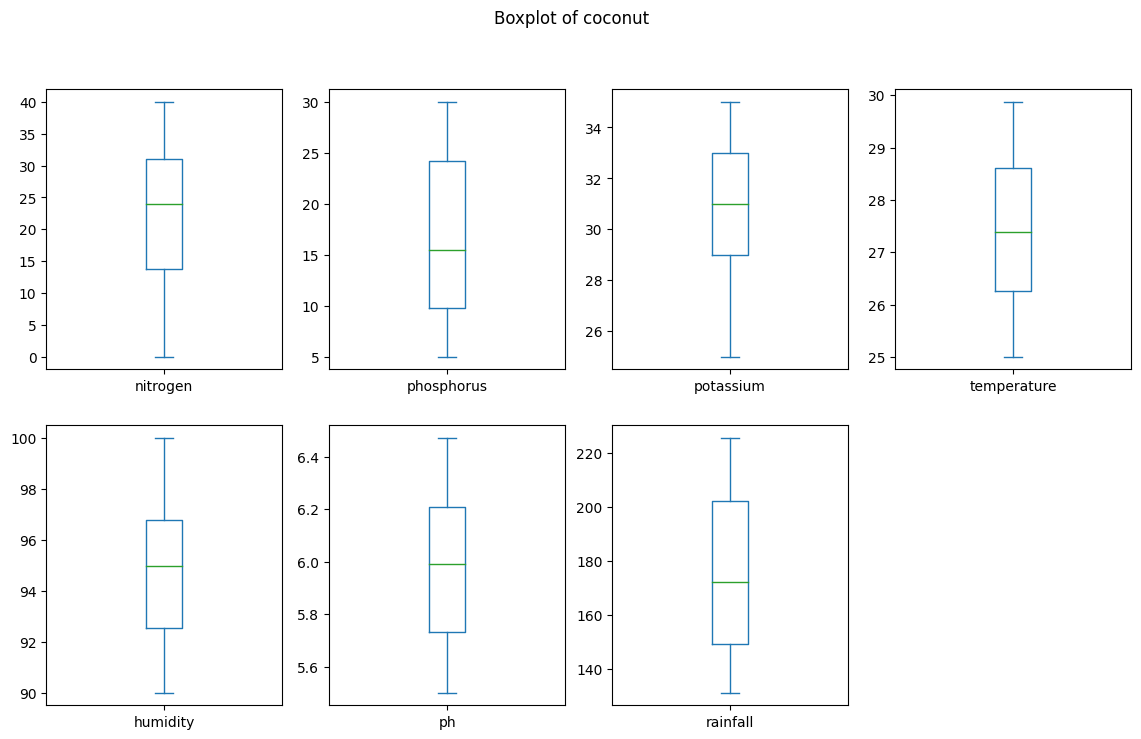

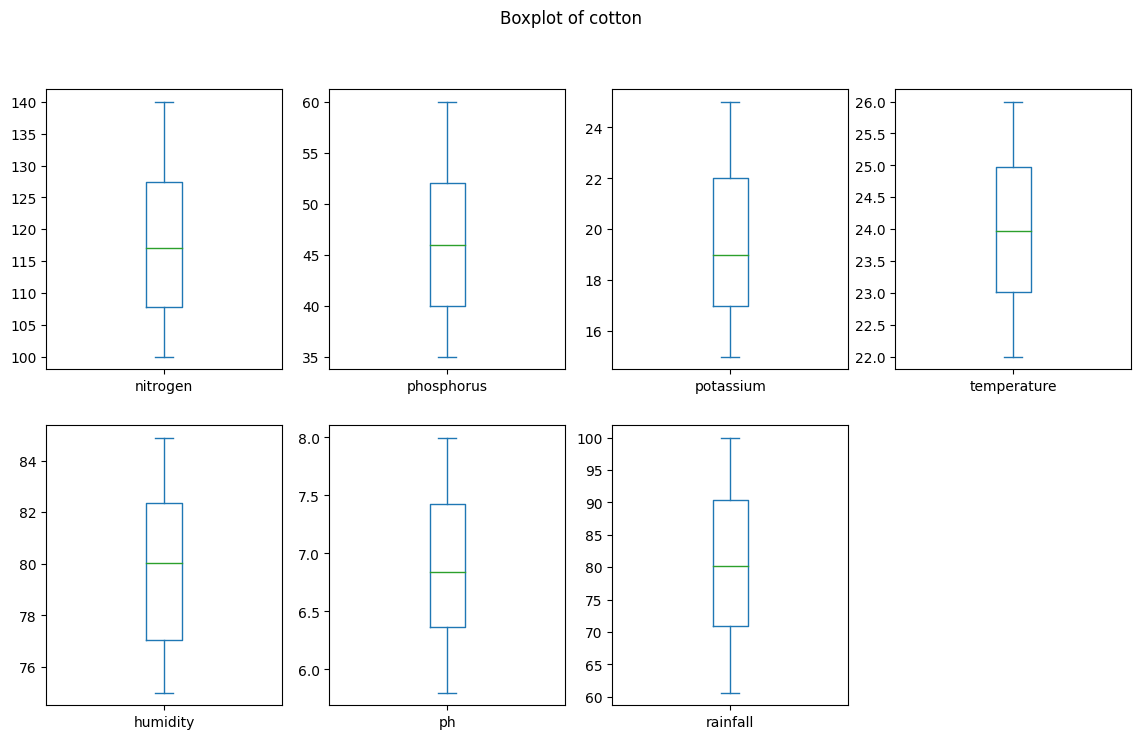

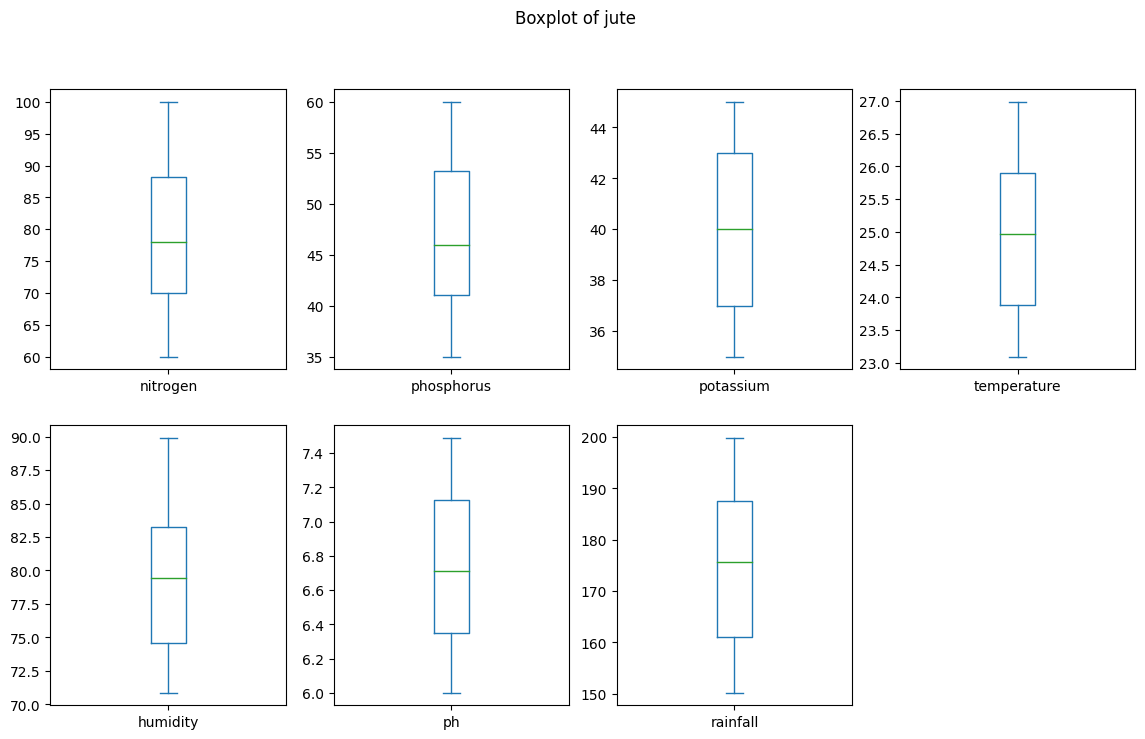

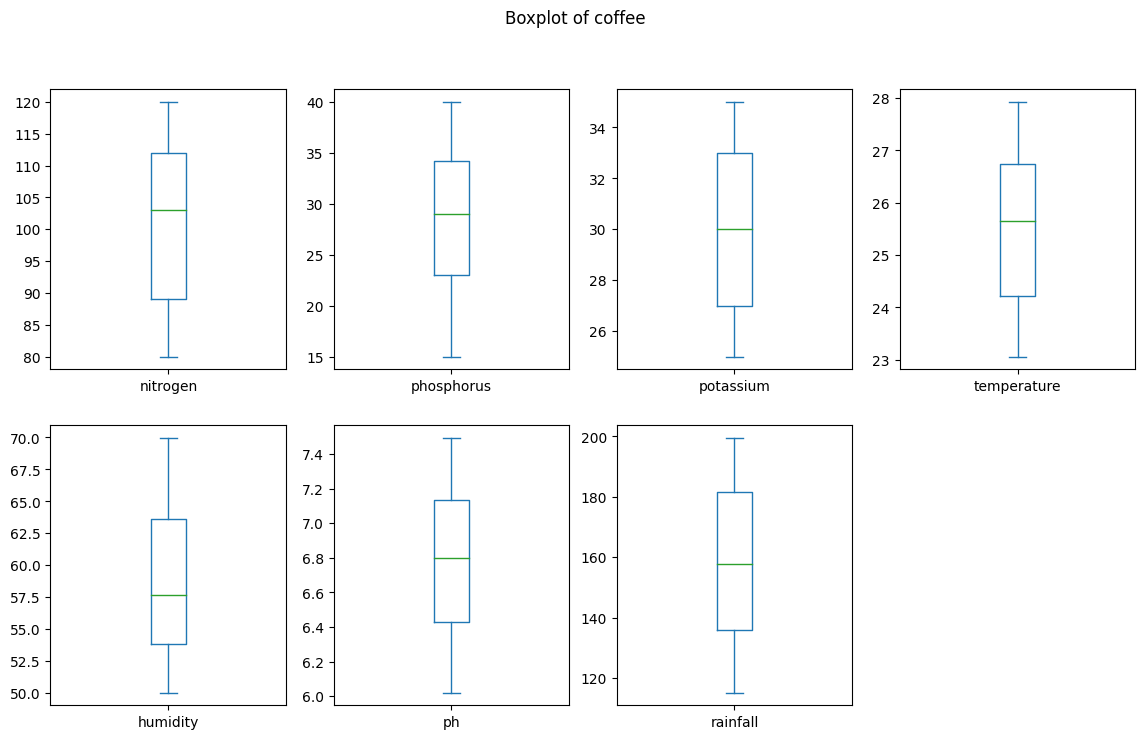

In [144]:
for type in cropTypes:
    colType = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']
    data_1[data_1.label == type][colType].plot(kind='box', subplots=True, layout=(2,4), figsize=(14,8), title=("Boxplot of " + type))

- Based on the boxplots plotted, we can conclude that the outliers are due to the different types of plants requiring different amounts of nutrients and conditions respectively.

# Gathering Insights from the Dataset

- I will generate a heatmap to check for correlations between variables.

In [145]:
corr = data_1.corr()

corr

/var/folders/wg/94qct4cj7dd8zvyqctl1sxh40000gn/T/ipykernel_60116/2852564412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_1.corr()


,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


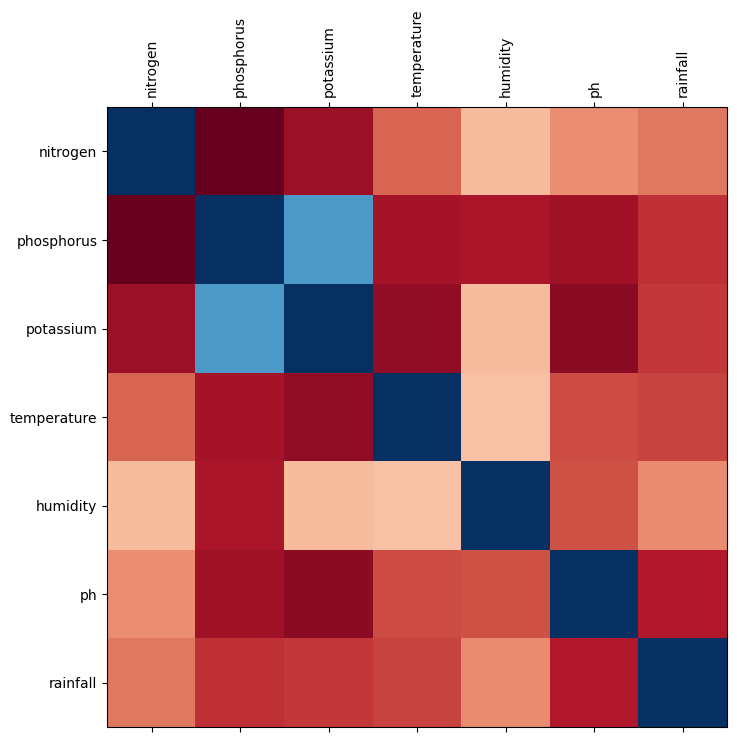

In [146]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number, __annotations__=True)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

- Based on the heatmap generated, there appears to be a significant relationship betweeen phosphorus and potassium.
- To dig deeper into the relationship, I will generate a scatter plot.

<Axes: title={'center': 'Scatter Plot of Potassium against Phosphorus'}, xlabel='phosphorus', ylabel='potassium'>

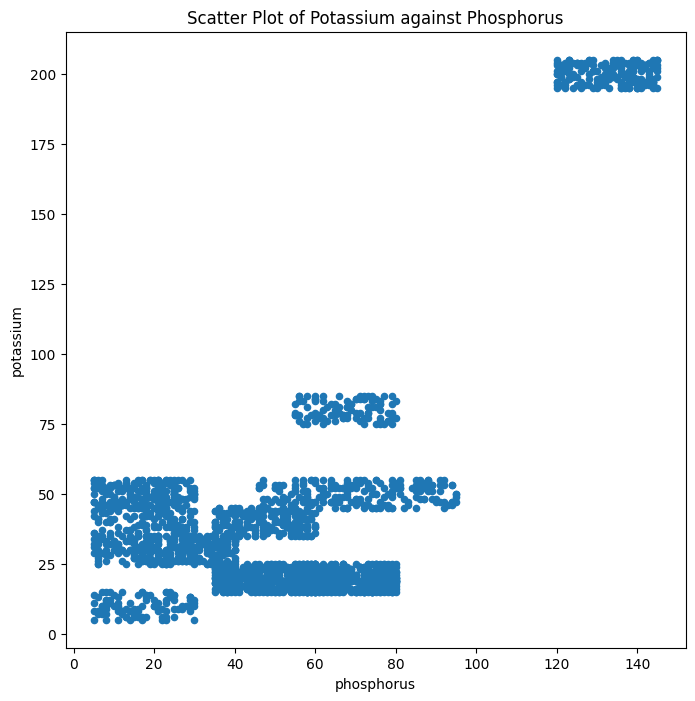

In [147]:
data_1.plot(kind='scatter', x='phosphorus', y='potassium', figsize=(8,8), title="Scatter Plot of Potassium against Phosphorus")

- Split the data based on the types of crop.

/Users/javianng/opt/anaconda3/envs/DataScience_Python/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


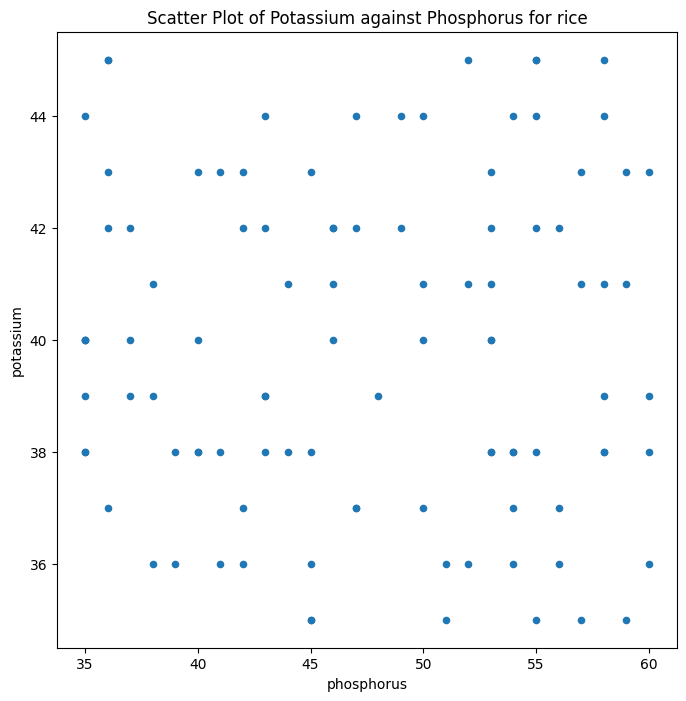

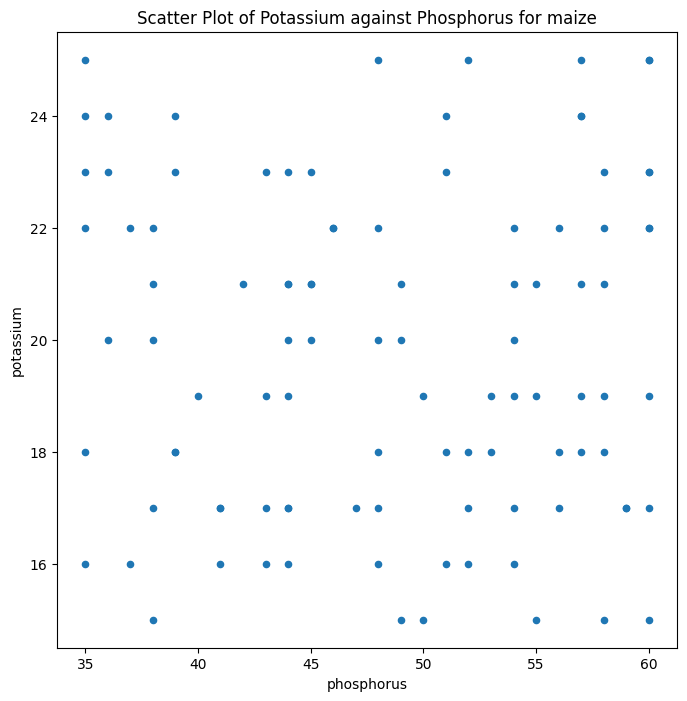

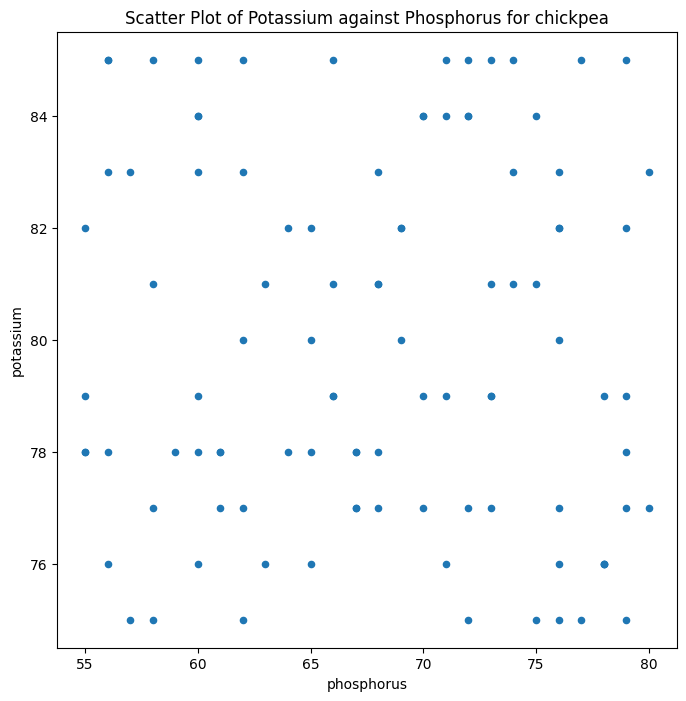

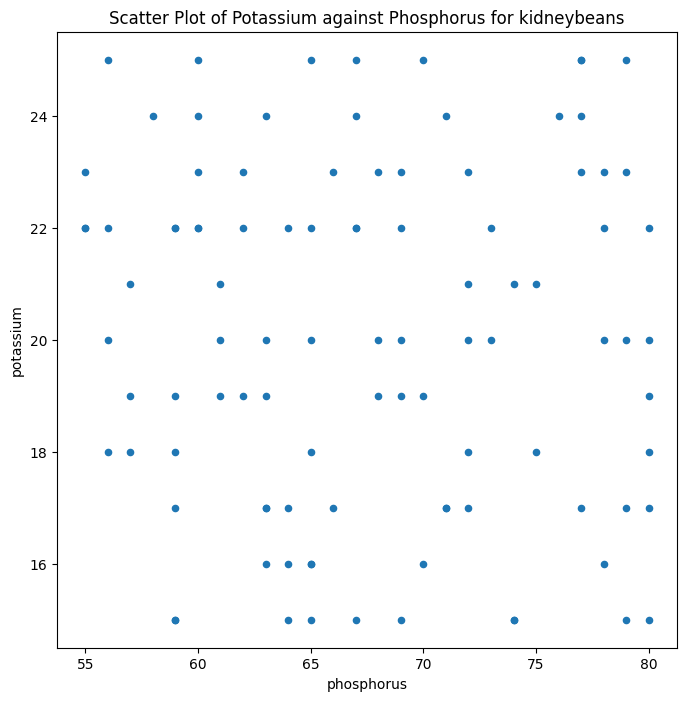

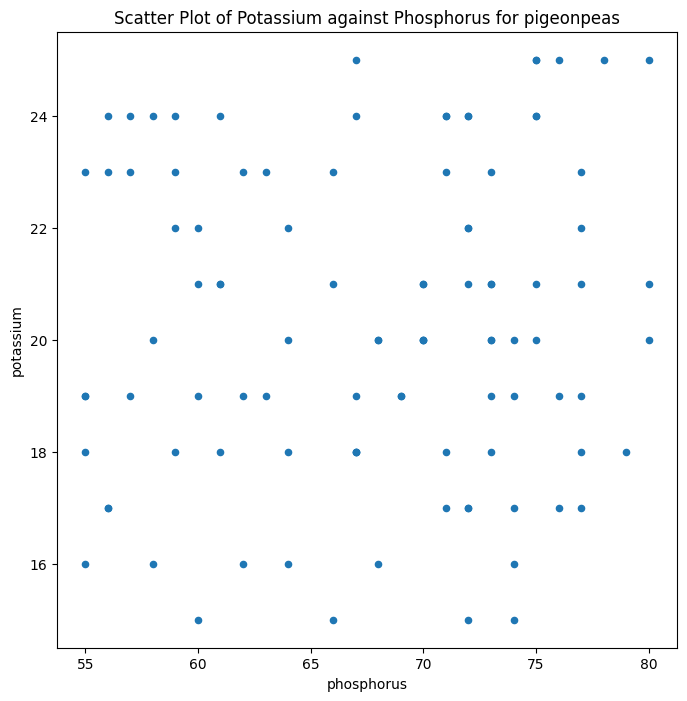

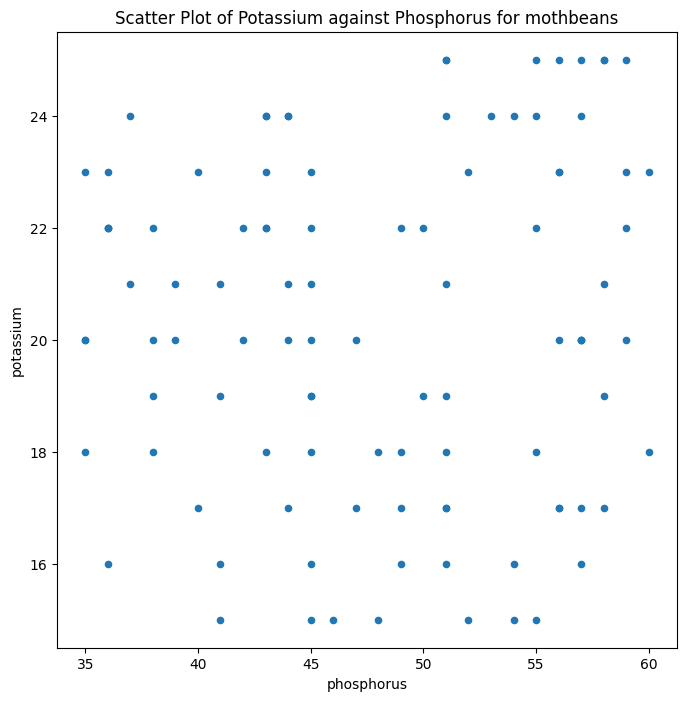

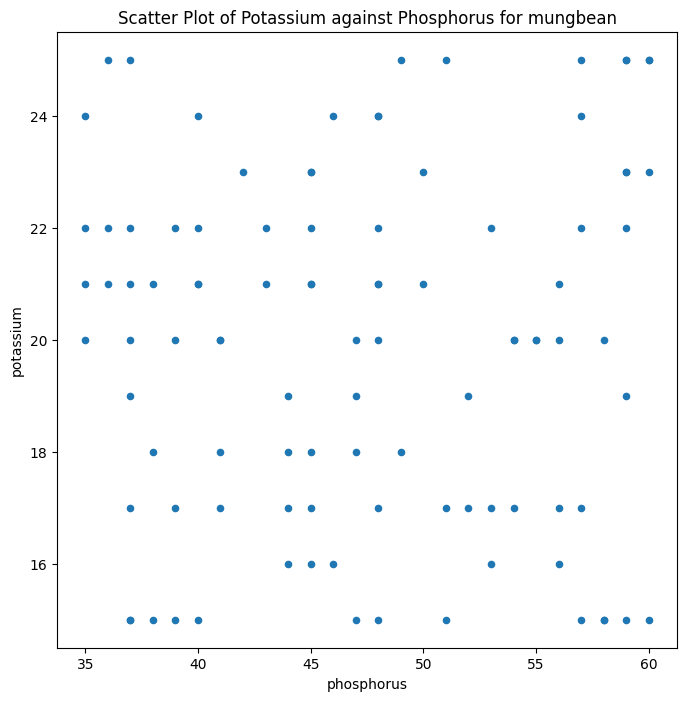

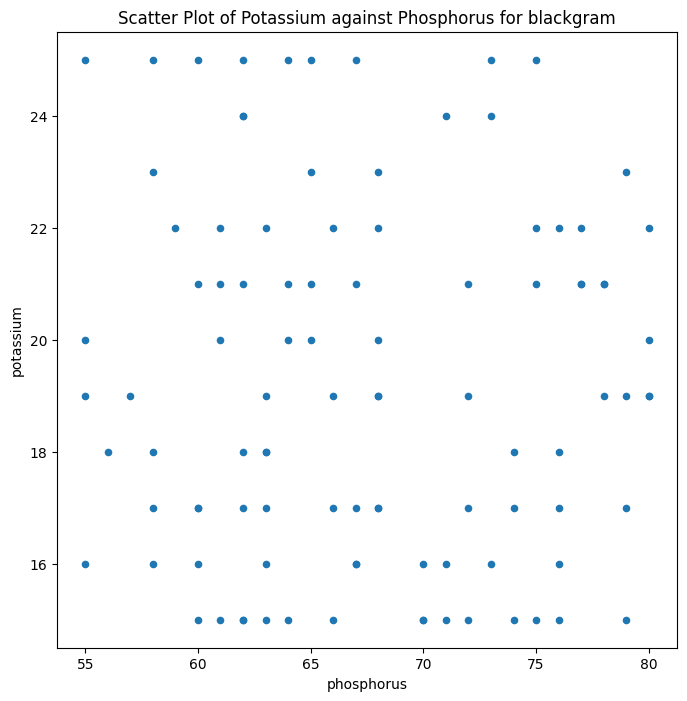

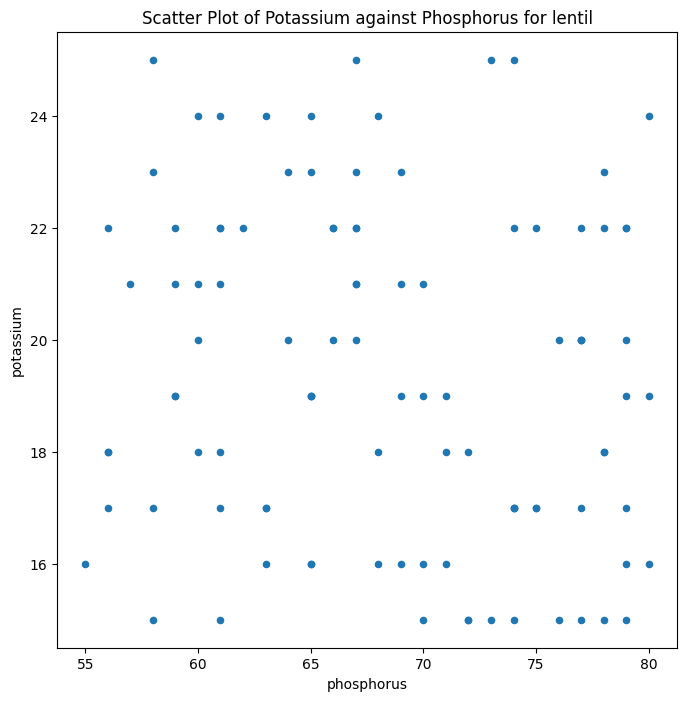

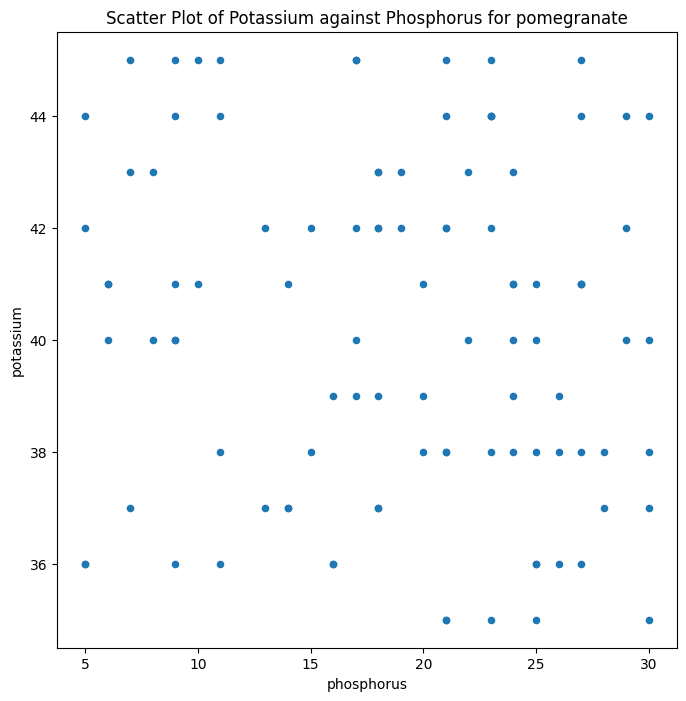

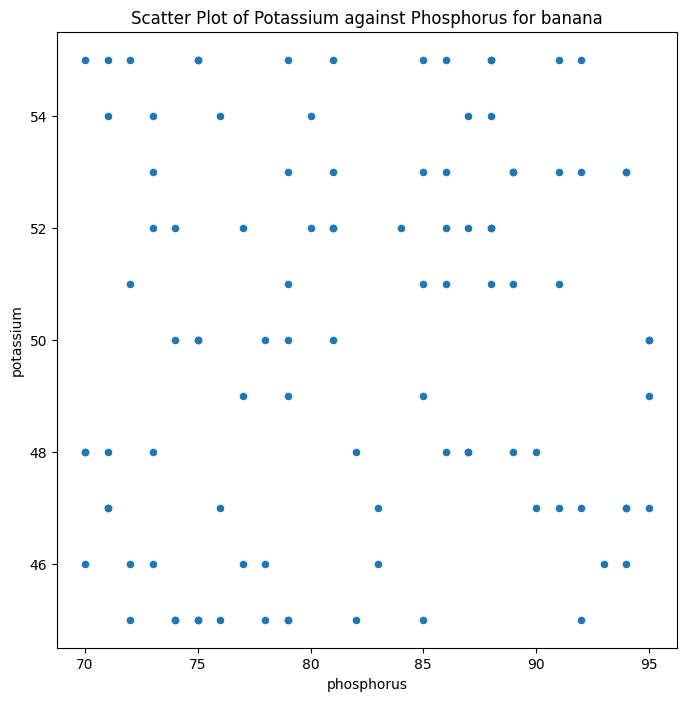

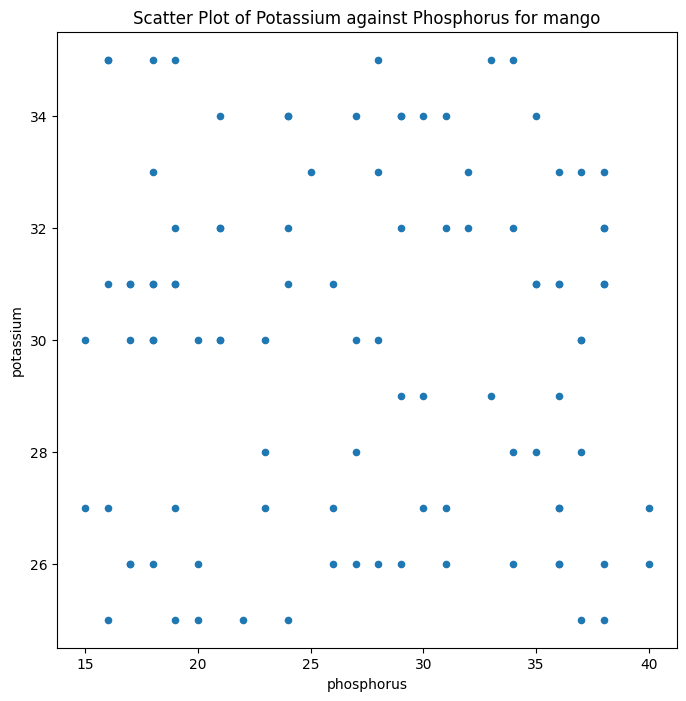

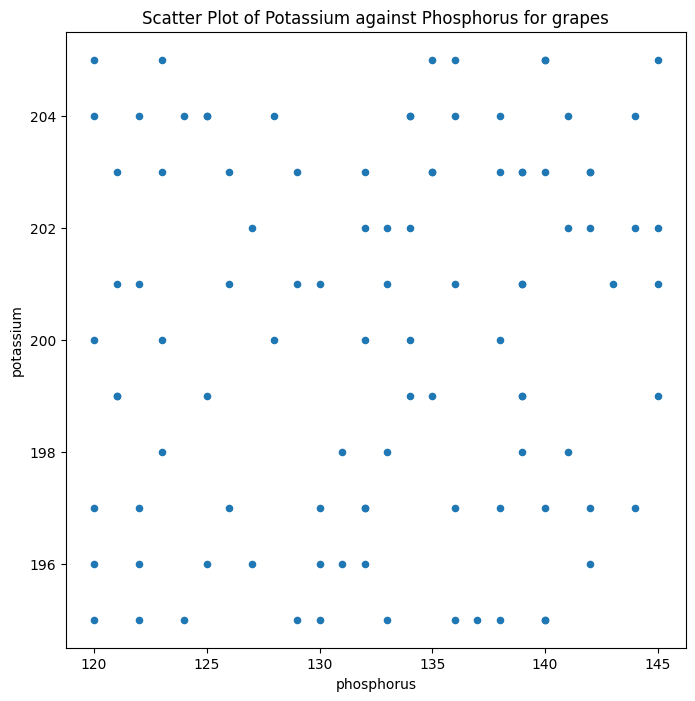

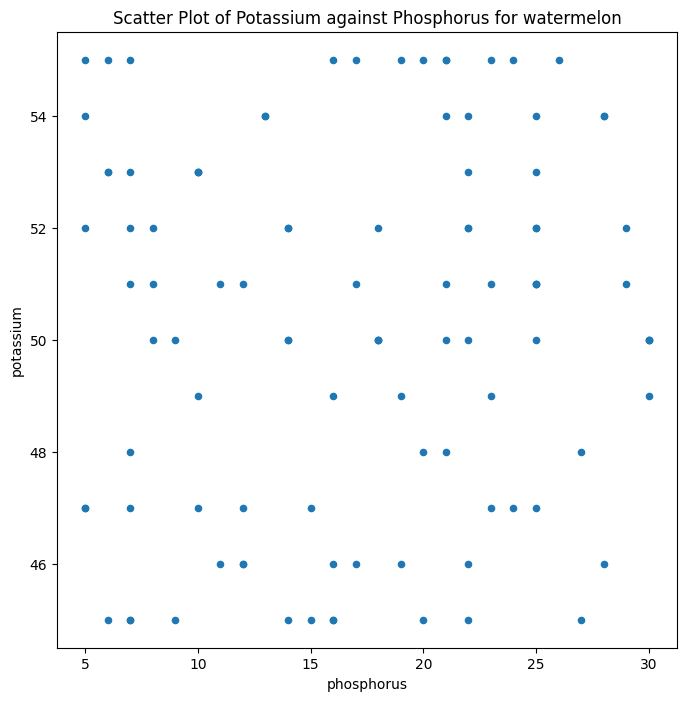

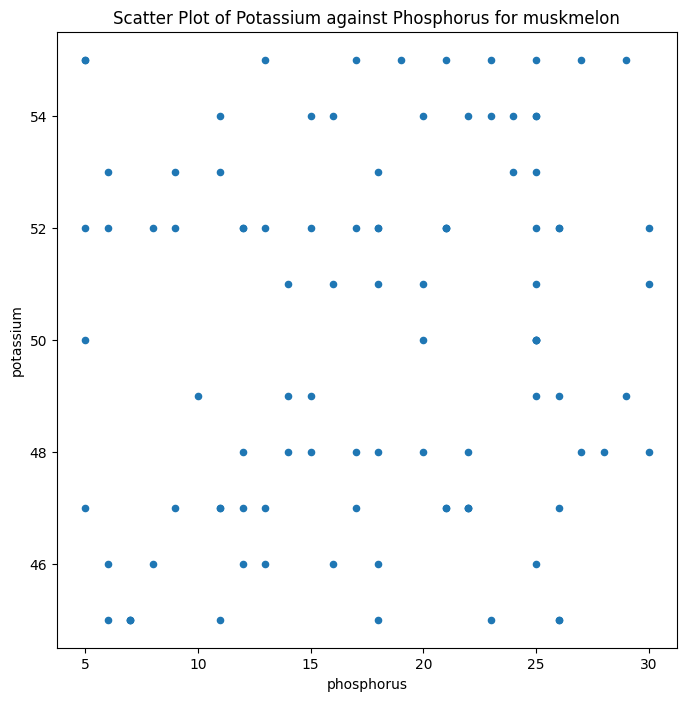

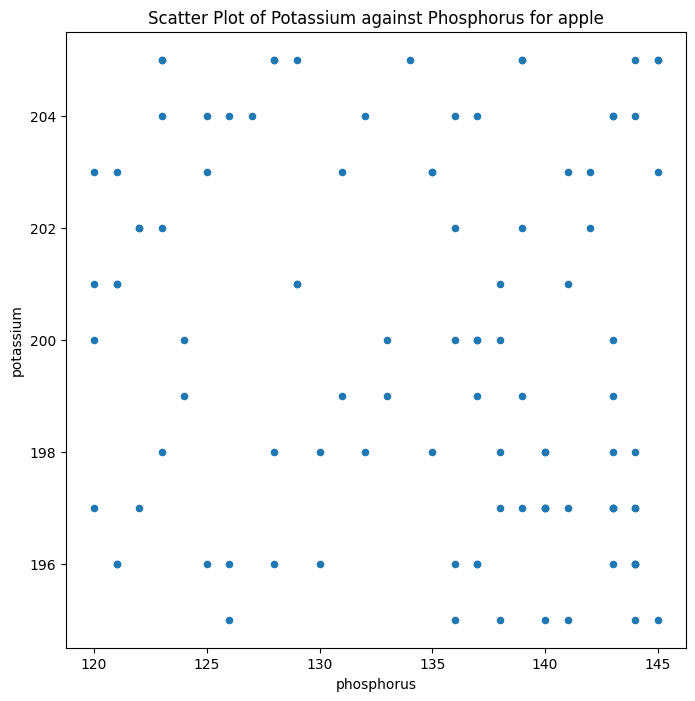

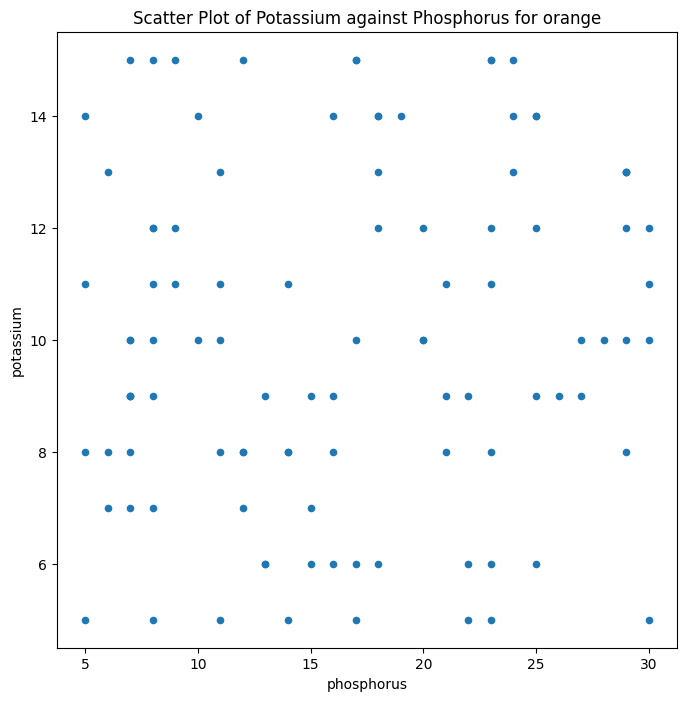

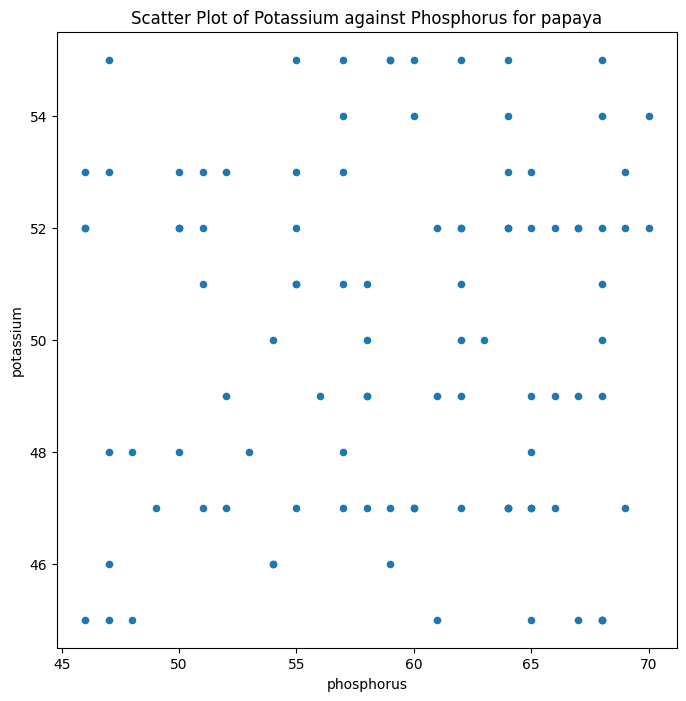

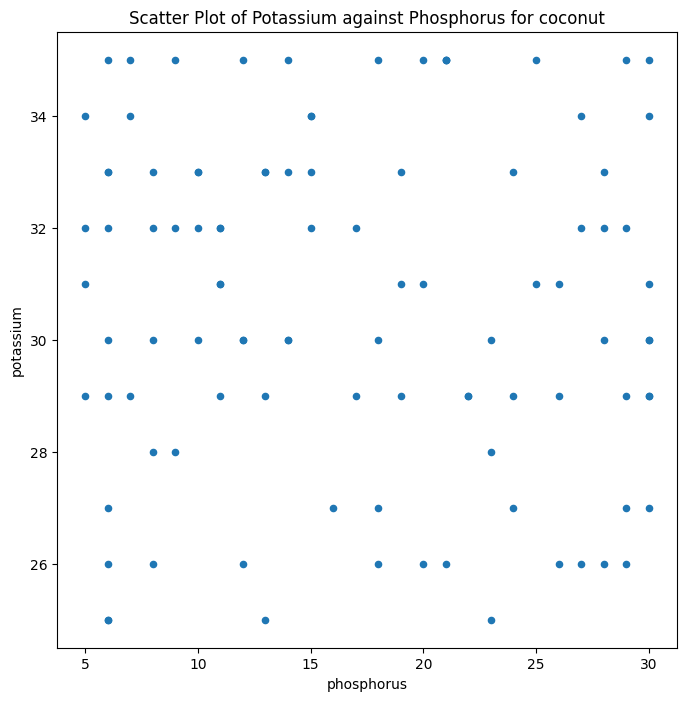

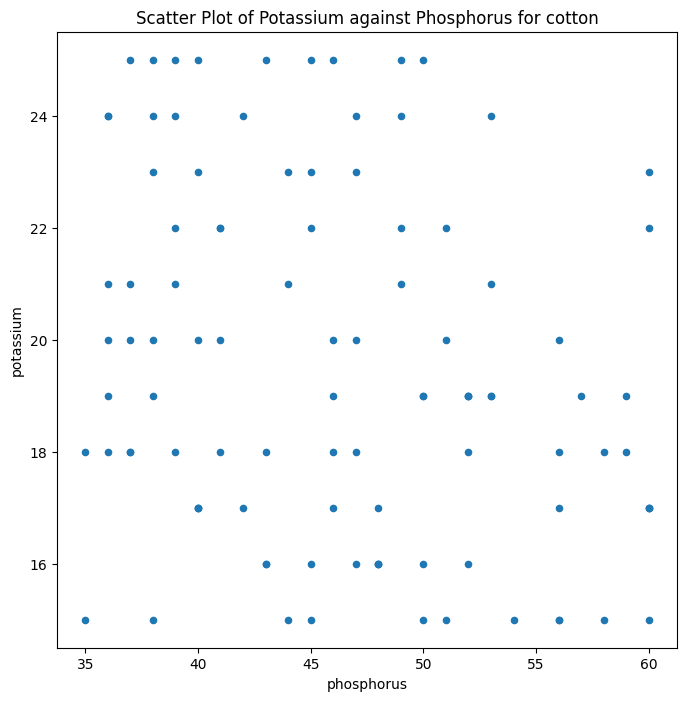

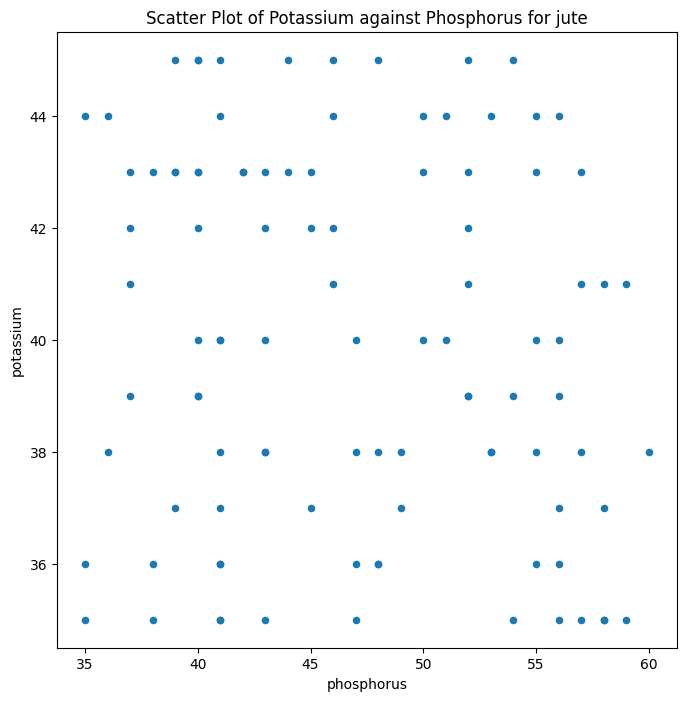

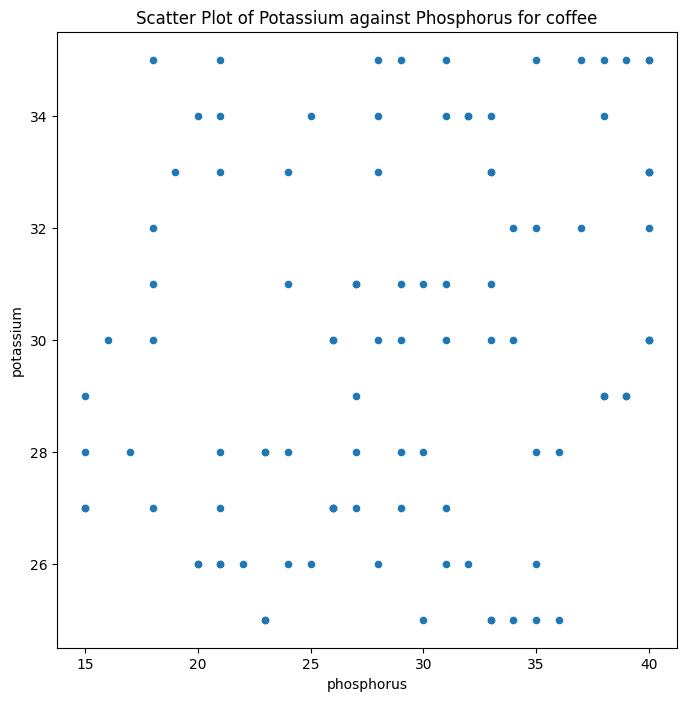

In [150]:
for type in cropTypes:
    data_1[data_1.label == type].plot(kind='scatter', x='phosphorus', y='potassium', figsize=(8,8), title=("Scatter Plot of Potassium against Phosphorus for " + type))

- Based on the data by different types of crops, we are unable to draw any conclusion about the correlation between potassium and phosphorus. 
- There are no visible correlations and no obvious outliers.
- However, from the scatter plot with all the different types of crops, we can see that phosphorus and potassium for each type of crop is seen "grouped together" in a neat rectangle.
- Let's observe the difference between the plants and their respective average nutrients and conditions level.

In [170]:
# colType = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']

data_2 = data_1.groupby('label').mean() # Group the data by label
display(data_2)

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


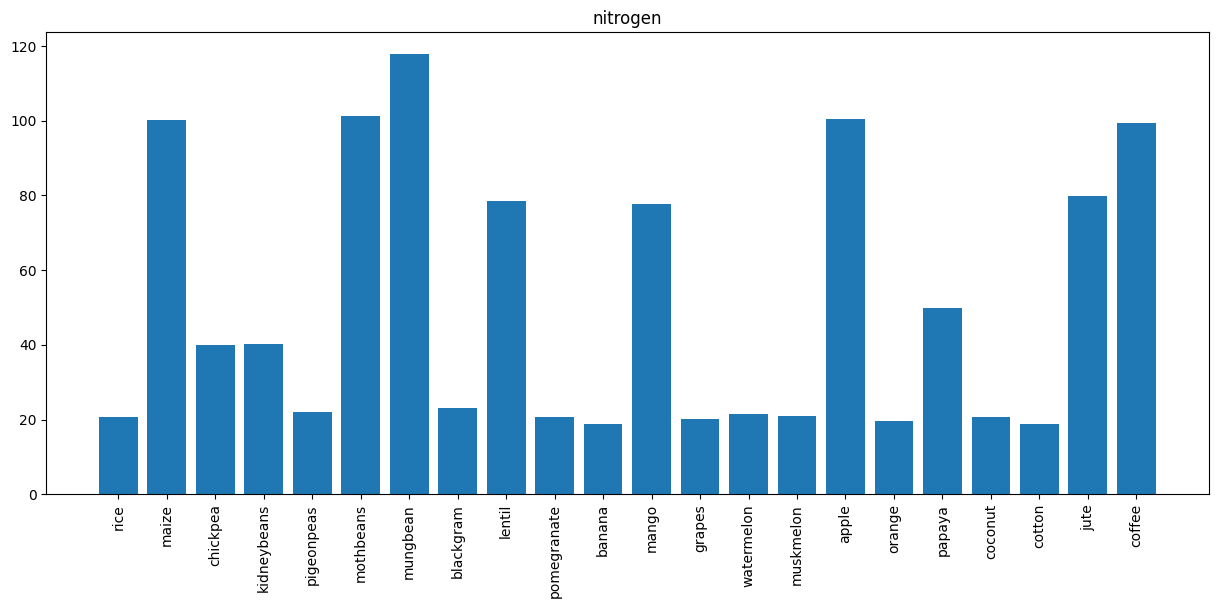

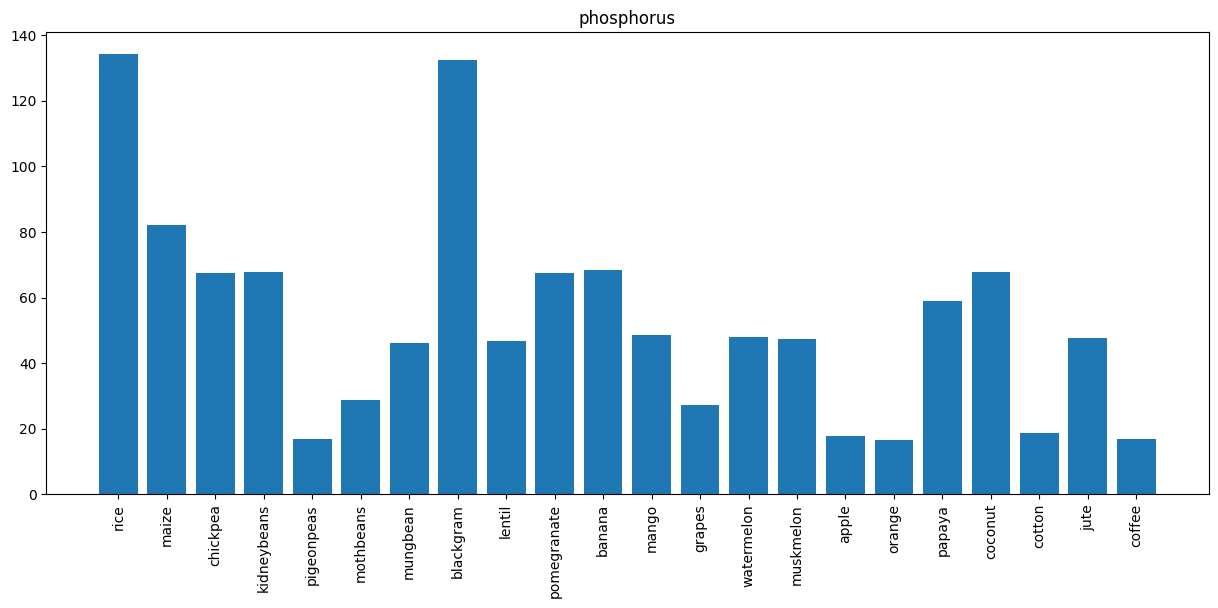

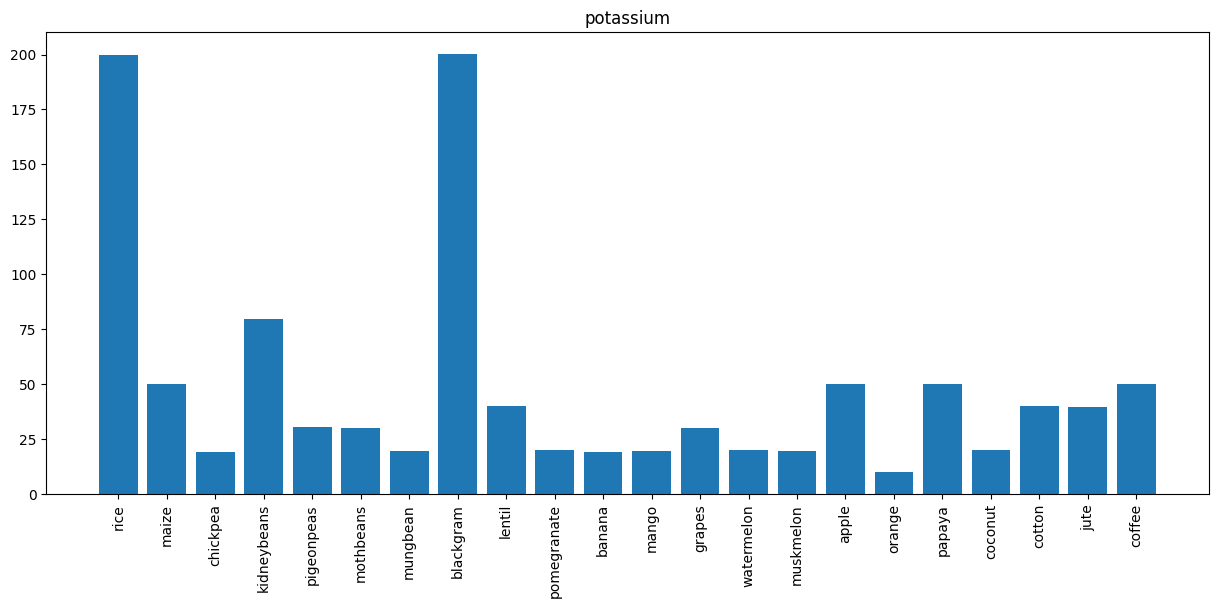

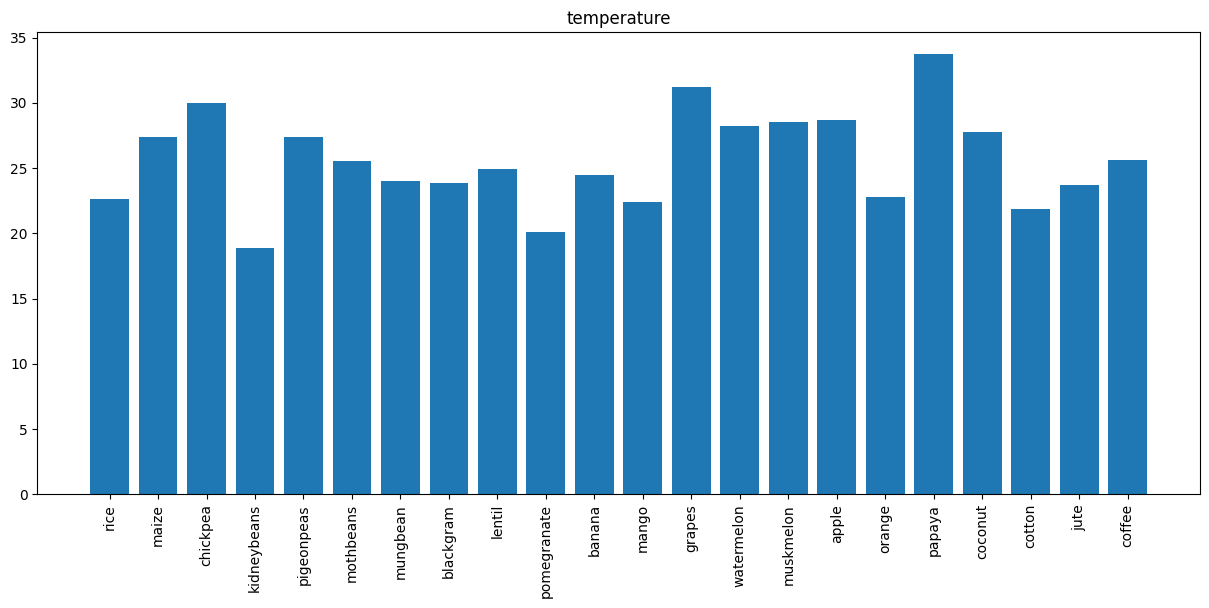

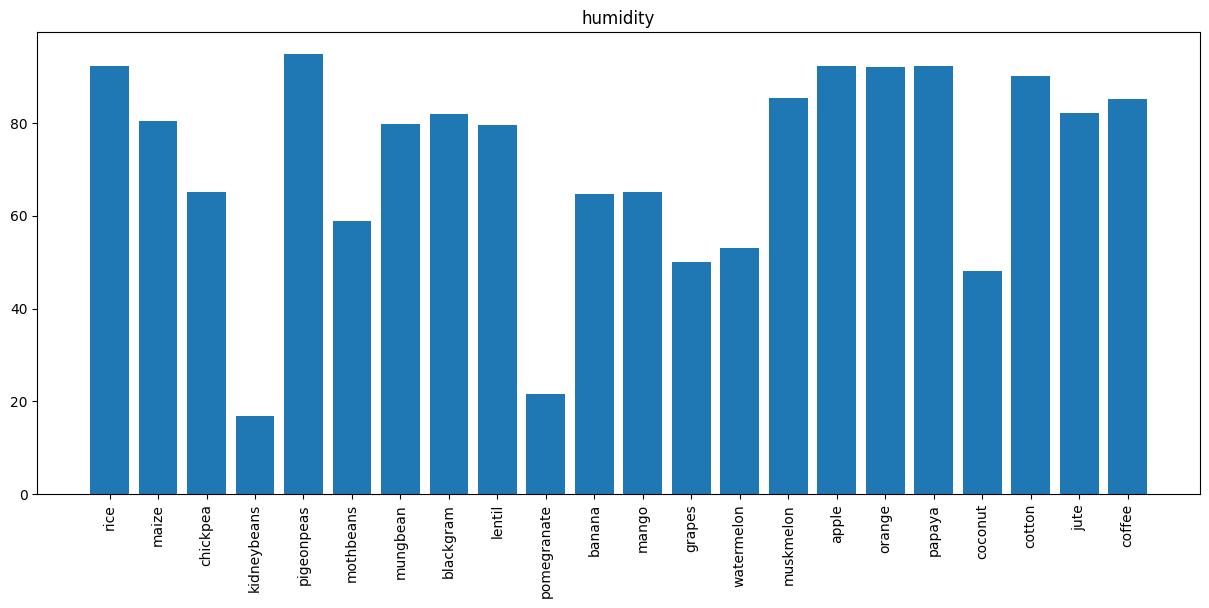

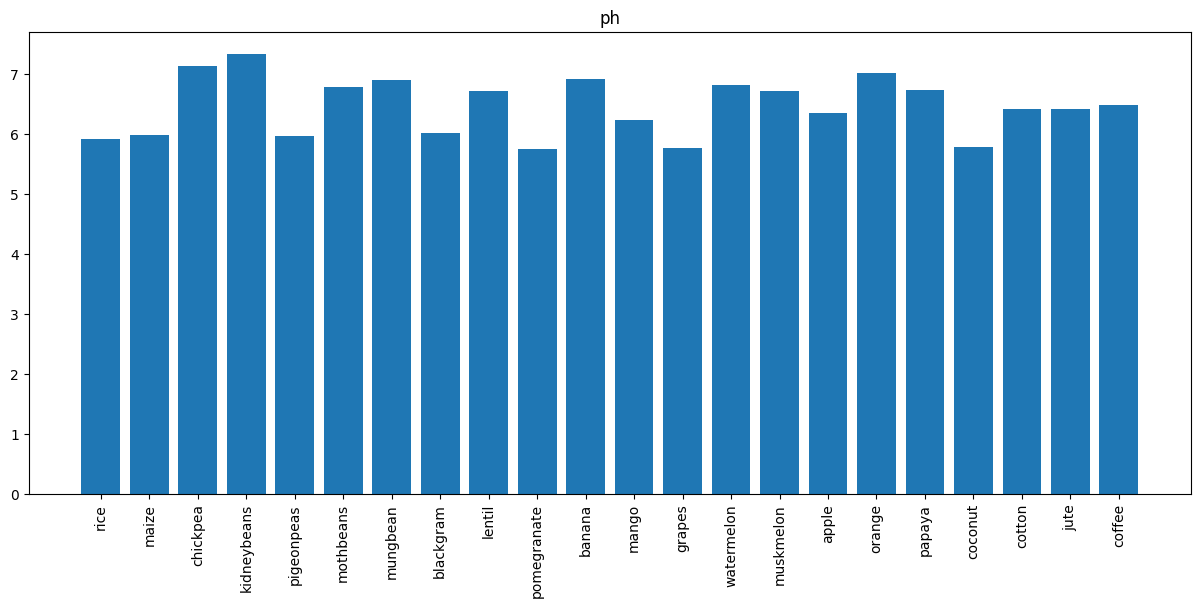

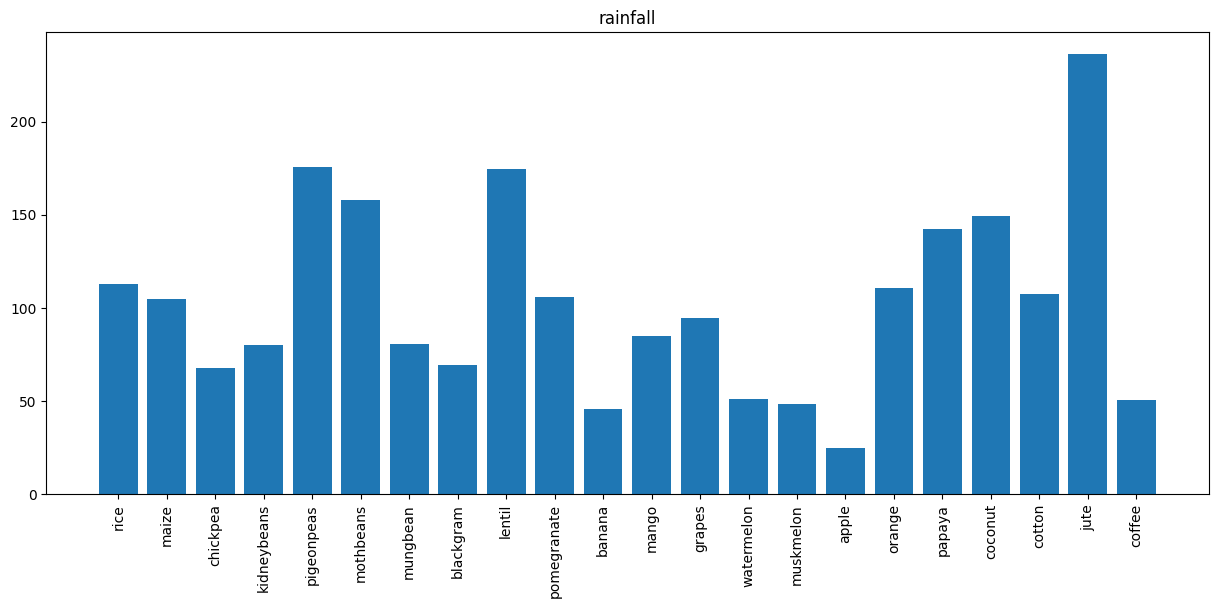

In [192]:
for col in colType:
    plt.figure(figsize=(15,6))
    plt.title(col)
    plt.bar(cropTypes, data_2[col])
    plt.xticks(rotation=90)